<a href="https://colab.research.google.com/github/July-to-me/Pokemon_Data_Analysis/blob/main/Pokemon_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The world of Pokemon is very vast, filled with creatures that represent animals in real life, but some modifications that makes them unique, as well as having an elemental attribute to go along with the Pokemon. It is an extremely popular phenomenon that has captured people hearts ever since 1996, and the popularity is not fading away anytime soon. 

I created this project in order to improve my coding skills as well as getting to know a lot more about the world of Pokemon. I wanted to see if I can get some defintive answers of the following:

1. Is it possible to create a model that will classify a Pokemon's legendary status based on its stats?
2. Is the a consistent theme of each type? Meaning are lightning types usually faster than rock types, and do fighting types have more physical attack than special attack?
3. Is there a way for me to predict how many pokemon (both legendary and non-legendary) there will be in the next region/generation? 
4. Can I turn this project into a large scale dashboard with other files that I can find in the near future? 

There are some of the answers that I have been yearning to answer ever since I started my education in Statistics and in Computer Science as well. 



We can see that we will be setting up the packages that we will be using. 

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from urllib.request import urlopen
import plotly.express as px
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from IPython.display import HTML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from google.colab import drive
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import tree

In [ ]:
!pip install plotly==5.5.0 # Installing plotly 
%matplotlib inline 
import plotly.express as px 

In [ ]:
## Updating plotly in order to use it in colab
## Installing jupyter dash to see intereactive plots
!pip install --upgrade plotly
!pip install jupyter-dash 

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
from jupyter_dash import JupyterDash
from dash import dcc
import dash_html_components as html
from dash.dependencies import Input, Output 

# Setting Directory and File Path

In [ ]:
drive.mount('/content/drive/')


In [ ]:
file_path = '/content/drive/MyDrive/Pokemon.csv'

# Reading the files

In [ ]:
# Reading the Pokemon.csv file
poke = pd.read_csv(file_path) # Access to the file without any downloads
      # https://www.kaggle.com/datasets/abcsds/pokemon?datasetId=121&sortBy=dateCreated Here is where you can download it.
# poke = pd.read_csv("Pokemon.csv") # This is the way that I have been doing for the longest

In [ ]:
poke.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
## Seeing rows of dataframe
len(poke.axes[0])

1058

In [ ]:
## Seeing the numbers of types in Type 1 
unique_one_types = poke['Type 1'].nunique()
print(unique_one_types)

18


In [ ]:
# checking if we need to change type of data in the dataframe
print(poke.dtypes) 
## We need to change the following
  # - change the Legendary attribute from "True/False" to "0/1" 
  # - change NaN under Type 2 into zeroes 
  # - I also want to see if I can create a new column or way to get both types and not rely on a pokemon's 1st type

#                int64
Name            object
Type 1          object
Type 2          object
Total            int64
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed            int64
Generation       int64
Legendary        int64
Ultra Beast    float64
Region          object
dtype: object


# A view in Pokemon's stats overall with distribution

In [ ]:
## Seeing the distribution amongst the Pokedex
poke[["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]].describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000
mean,439.123819,69.918715,80.738185,74.531191,73.020794,72.103025,68.829868
std,119.457805,25.706829,32.417722,30.819330,32.666798,27.488912,30.079890
min,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,330.000000,50.000000,56.000000,50.250000,50.000000,50.000000,45.000000
50%,460.000000,68.000000,79.500000,70.000000,65.000000,70.000000,65.000000
75%,515.000000,82.750000,100.000000,90.000000,95.000000,90.000000,90.000000
max,780.000000,255.000000,190.000000,230.000000,194.000000,230.000000,200.000000


In [ ]:
# Pokedex Plot
hp_df = poke['HP']
attack_df = poke['Attack']
defense_df = poke['Defense']
sp_atk_df = poke['Sp. Atk']
sp_def_df = poke['Sp. Def']
speed_df = poke['Speed']

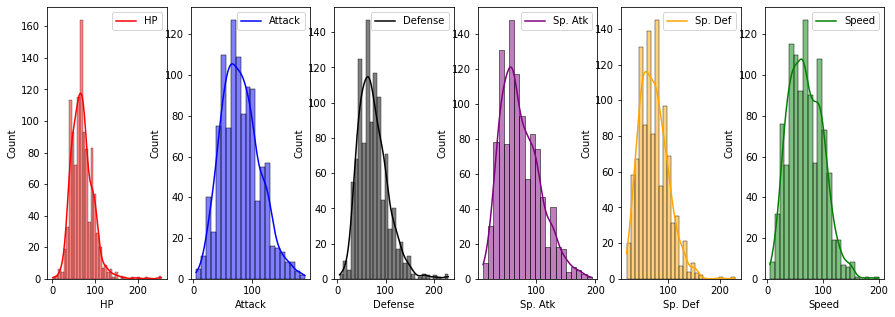

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 6, figsize=(15,5))
sns.histplot(hp_df, kde= True, ax = axes[0], color= 'red')
sns.histplot(attack_df, kde= True, ax = axes[1], color= 'blue')
sns.histplot(defense_df, kde= True, ax = axes[2], color= 'black')
sns.histplot(sp_atk_df, kde= True, ax = axes[3], color= 'purple')
sns.histplot(sp_def_df, kde= True, ax = axes[4], color= 'orange')
sns.histplot(speed_df, kde= True, ax = axes[5], color= 'green')

axes[0].legend(labels = ['HP'])
axes[1].legend(labels = ['Attack'])
axes[2].legend(labels = ['Defense'])
axes[3].legend(labels = ['Sp. Atk'])
axes[4].legend(labels = ['Sp. Def'])
axes[5].legend(labels = ['Speed'])

plt.show()

# Data Manipulation/Cleaning 

In [ ]:
## Creating a df for legendaries only 
  # Legendaries in Pokemon are known to have higher stats compared to non-legendaries. 
  # Making a dataframe seperately for them will provide more statical analysis.
poke["Legendary"] = poke["Legendary"].astype(int)
poke['Type 2'] = poke.apply(lambda row: row['Type 1'] if pd.isna(row['Type 2']) else row['Type 2'], axis = 1 )
  ## Creating a lambda function that allows us to replace a pokemon's type 2 NaN value into the type 1 of the pokemon. 
  

In [ ]:
# Making sure different pokemon variants are in their respective region. 
  # Based on observation, Alolan variants are considered to be in the Kanto region. 
  # This is false as the Alolan variants are not from Kanto, but rather in Alola
  # We can also do this for Galar since there are also Galran region pokemon too. 

poke.loc[poke['Name'].str.contains('Alolan'), 'Generation'] = 7  
poke.loc[poke['Name'].str.contains('Galar'), 'Generation'] = 8

In [ ]:
# Setting Generations into regions
  # We can treat these words the same since they mean the same thing in game

gen_to_region = {1: "Kanto", 2:"Johto", 3:"Hoenn",
                 4:"Sinnoh", 5:"Unova", 6:"Kalos",
                 7:"Alola", 8:"Galar"}

poke['Region'] = poke['Generation'].map(gen_to_region)

In [ ]:
## Just to check if it worked

#poke[poke.Generation == 7]
#poke[poke.Generation == 8] 

## It worked!

# Creating Dataframes for various Pokemon attributes

 I am creating an ultra beast column since I do think it is worth looking into if the machine can notice the difference of an Ultra Beast compared to a legendary pokemon. This is because Ultra Beasts are entities that are not really pokemon, as they are from a parallel universe from the Pokemon Universe that got trapped. But fall under the legendary pokemon status in order to keep everythink afloat. 

In [ ]:
# Subsetting pokemon that are in the Ultra Beast category
ulra_beast = ['Nihilego', 'Buzzwole', 'Pheromosa', 
           'Xurkitree', 'Celesteela', 'Kartana', 
           'Guzzlord', 'Poipole', 'Naganadel', 
           'Stakataka', 'Blacephalon']

In [ ]:
# Creating a true/false statement but in 1/0 respectively.
for pokemon_name in ulra_beast:
  poke.loc[poke['Name'] == pokemon_name, 'Ultra Beast'] = 1
  poke['Ultra Beast'] = poke['Ultra Beast'].fillna(0)

In [ ]:
# Creating a dataframe that is for legendary pokemon
df_legend = poke[poke.Legendary == 1]

In [ ]:
df_legend.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Ultra Beast
186,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,1,0.0
187,144,ArticunoGalarian Articuno,Psychic,Flying,580,90,85,85,125,100,95,1,1,0.0
188,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,1,0.0
189,145,ZapdosGalarian Zapdos,Fighting,Flying,580,90,125,90,85,90,100,1,1,0.0
190,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,1,0.0


In [ ]:
## Seeing rows of dataframe
len(df_legend.axes[0])

116

In [ ]:
## Creating a df for non-legendaries
  # Same thought process as before
df_nonleg = poke[poke.Legendary == 0]

In [ ]:
df_nonleg.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Ultra Beast
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0,0.0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0,0.0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0,0.0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0,0.0
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,0,0.0


In [ ]:
## Seeing rows of dataframe
len(df_nonleg.axes[0])

942

In [ ]:
## This function creates a dataframe for a specific type of pokemon regardless if it is type 1 or type 2 
  ## Example 
      ## Charizard will go under the Fire and Flying DataFrame because Charizard is considered both a Fire and Flying type.
      ## Pikachu will just go under electric type under electric dataframe since Pikachu is only electric.

def get_pokemon_by_type(types):
    df_types = pd.DataFrame()
    for t in types:
        df_type = poke[(poke['Type 1'] == t) | (poke['Type 2'] == t)]
        df_types = pd.concat([df_types, df_type], axis=0)
    return df_types

In [ ]:
## Creating a new dataframes for all types seperately for more in-depth data analysis

electric_pokemon = get_pokemon_by_type(['Electric'])
fire_pokemon = get_pokemon_by_type(['Fire'])
water_pokemon = get_pokemon_by_type(['Water'])
grass_pokemon = get_pokemon_by_type(['Grass'])
psychic_pokemon = get_pokemon_by_type(['Psychic'])
dark_pokemon = get_pokemon_by_type(['Dark'])
fighting_pokemon = get_pokemon_by_type(['Fighting'])
ground_pokemon = get_pokemon_by_type(['Ground'])
flying_pokemon = get_pokemon_by_type(['Flying'])
dragon_pokemon = get_pokemon_by_type(['Dragon'])
ice_pokemon = get_pokemon_by_type(['Ice'])
fairy_pokemon = get_pokemon_by_type(['Fairy'])
ghost_pokemon = get_pokemon_by_type(['Ghost'])
rock_pokemon = get_pokemon_by_type(['Rock'])
bug_pokemon = get_pokemon_by_type(['Bug'])
steel_pokemon = get_pokemon_by_type(['Steel'])
poison_pokemon = get_pokemon_by_type(['Poison'])
normal_pokemon = get_pokemon_by_type(['Normal'])
## I can make this shorter with a for loop but this will suffice
  ## Done so in the 2nd next line

In [ ]:
electric_pokemon.head() ## It works!

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Region
32,25,Pikachu,Electric,Electric,320,35,55,40,50,50,90,1,0,Kanto
33,26,Raichu,Electric,Electric,485,60,90,55,90,80,110,1,0,Kanto
34,26,RaichuAlolan Raichu,Electric,Psychic,485,60,85,50,95,85,110,7,0,Alola
95,74,GeodudeAlolan Geodude,Rock,Electric,300,40,80,100,30,30,20,7,0,Alola
97,75,GravelerAlolan Graveler,Rock,Electric,390,55,95,115,45,45,35,7,0,Alola


In [ ]:
## Creating a function that allows to create a dataframe of a type based on a list 

types_list = ['Grass', 'Fire', 'Water', 'Electric', 'Psychic', 
              'Dark', 'Fighting', 'Ground', 'Flying', 'Dragon', 
              'Ice', 'Fairy', 'Ghost', 'Rock', 'Bug',
              'Steel', 'Poison',  'Normal'] 
df_list = []
for type in types_list:
    # extracting data of each type into a separate dataframe
    type_df = poke[(poke['Type 1'] == type) | (poke['Type 2'] == type)]
    df_list.append(type_df)

In [ ]:
df_list[0]## It works! 
  ## 0 = Grass, 1 = Fire, so on and so forth 

In [ ]:
## We can also check the difference between 1 type vs 2 types pokemon.
  ## See if it is statically better for a pokemon to have 1 or 2 typings
one_type_pokemon = poke.loc[poke['Type 1'] == poke['Type 2']] 

In [ ]:
one_type_pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Region,Ultra Beast
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,0,Kanto,0.0
5,5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80,1,0,Kanto,0.0
9,7,Squirtle,Water,Water,314,44,48,65,50,64,43,1,0,Kanto,0.0
10,8,Wartortle,Water,Water,405,59,63,80,65,80,58,1,0,Kanto,0.0
11,9,Blastoise,Water,Water,530,79,83,100,85,105,78,1,0,Kanto,0.0


In [ ]:
## Seeing rows of dataframe
len(one_type_pokemon.axes[0])

485

In [ ]:
## Getting the dataset with pokemons with two types
two_type_pokemon = poke.loc[poke['Type 1'] != poke['Type 2']] ## This will help us seperate those who have the same typing under 1 and 2

In [ ]:
two_type_pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Region
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0,Kanto
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0,Kanto
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0,Kanto
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0,Kanto
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,0,Kanto


In [ ]:
## Seeing rows of dataframe
len(two_type_pokemon.axes[0])

573

If we would compare both, we should now the population size, and we can see that two_type_pokemon are more potent than one_type_pokemon. 

In [ ]:
## Creating a df based upon Mega Evolutions as well.  
mega_poke = poke[poke['Name'].str.contains("Mega")]
mega_poke.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Region,Ultra Beast
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0,Kanto,0.0
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,0,Kanto,0.0
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,0,Kanto,0.0
12,9,BlastoiseMega Blastoise,Water,Water,630,79,103,120,135,115,78,1,0,Kanto,0.0
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,0,Kanto,0.0


In [ ]:
non_mega = poke[~poke['Name'].str.contains("Mega")] ## Getting values that do not have the name "Mega"
non_mega.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Region,Ultra Beast
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0,Kanto,0.0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0,Kanto,0.0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0,Kanto,0.0
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,0,Kanto,0.0
5,5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80,1,0,Kanto,0.0


In [ ]:
# Subsetting data based on Alolan vs non-Alolan variants 
Alola_pokemon = poke[poke['Name'].str.contains("Alola")] ## Getting values that contains the words "Alolan"
#Alola_pokemon.head() # We can see that all variants are here

In [ ]:
# Subsetting data based on Galar vs non-Galar variants 
Galar_pokemon = poke[poke['Name'].str.contains("Galar")] ## Getting values that contains the words "Galar"
#Galar_pokemon.head() # We can see that all variants are here

Subsetting the non-variants into their own dataframe 

  I think there is a way to get the pokemon names without using a list, but I will need to find that out later. I know that there is two words, I can make it to where it gets the 2nd word and find the same word in the dataframe and create a new dataframe with it

In [ ]:
# Subsetting data of the original variants 
og_alolan = ['Rattata', 'Raticate', 'Raichu', 'Sandshrew', 'Sandslash', 'Vulpix', 
             'Ninetales', 'Diglett', 'Dugtrio', 'Meowth', 'Persian', 'Geodude',
             'Graveler', 'Golem', 'Grimer', 'Muk', 'Exeggutor', 'Marowak']

non_alolan = poke[poke['Name'].isin(og_alolan) & poke['Generation'] == 1] ## Luckily all original pokemon were from Kanto and not in any other region.
  ## We can see non_galar will fullfil a different requirement since there are pokemon from Hoenn (generation 3)

# print(non_alolan)

In [ ]:
og_galar = ['Meowth', 'Ponyta', 'Rapidash', 'Slowpoke', 'Slowbro', 
            'Weezing', 'Mr. Mime', 'Articuno', 'Zapdos', 'Moltres', 
            "Farfetch'd", 'Slowking', 'Corsola', 'Zigzagoon', 'Linoone',
            'Darumaka', 'Zen Mode', 'Yamask', 'Stunfisk']
  ## We can see that Corsola and Darumaka are not from Kanto, since they are from Hoenn and Unova respectively. This will should be considered in our code.

non_galar = poke[poke['Name'].isin(og_galar) & (poke['Generation'].isin([1, 3, 5]))]

# print(non_galar)

# Average (Legendary) Pokemon per Region

Now we can do a bit of analysis for each dataset. 
I would like to start with looking into type distribution in each dataframe. The Mega evolution pokemon dataframe will be ignored as of right now. 

Just for fun, we will see the amount of legendary pokemon per region, as well as see the average legendary pokemon per region. 

In [ ]:
## Seeing the number of legendaries per generation/region
legendary_per_region = poke[poke['Legendary'] == True].groupby(['Generation'])['Legendary'].count()

print(legendary_per_region)

Generation
1     6
2     5
3    18
4    13
5    15
6     8
7    30
8    21
Name: Legendary, dtype: int64


In [ ]:
## Seeing the average legendary per region overall 
avg_legendary_freq = round(legendary_per_region.sum()/8)

print(avg_legendary_freq)

14


In [ ]:
## We can also do the amount of non-legendary pokemon per region too
non_legendary_per_region = poke[poke['Legendary'] != True].groupby(['Region', 'Generation'])['Legendary'].count()

print(non_legendary_per_region)

Region  Generation
Alola   7              86
Galar   8             104
Hoenn   3             142
Johto   2             104
Kalos   6              77
Kanto   1             164
Sinnoh  4             108
Unova   5             157
Name: Legendary, dtype: int64


In [ ]:
## Seeing the average non-legendary per region overall 
avg_non_legendary_freq = round(non_legendary_per_region.sum()/8)

print(avg_non_legendary_freq)

118


## Finding the count of all types based on generations

In [ ]:
def get_type_gen(df):
  group_sizes = df.groupby('Generation').size()
  result_df = pd.DataFrame({'Generation': group_sizes.index, 'Population Size': group_sizes.values})
  return result_df

In [ ]:
gen_electric_pokemon_pop = get_type_gen(electric_pokemon)
gen_fire_pokemon_pop = get_type_gen(fire_pokemon)
gen_water_pokemon_pop = get_type_gen(water_pokemon)
gen_grass_pokemon_pop = get_type_gen(grass_pokemon)
gen_psychic_pokemon_pop = get_type_gen(psychic_pokemon)
gen_dark_pokemon_pop = get_type_gen(dark_pokemon)
gen_fighting_pokemon_pop = get_type_gen(fighting_pokemon)
gen_ground_pokemon_pop = get_type_gen(ground_pokemon)
gen_flying_pokemon_pop = get_type_gen(flying_pokemon)
gen_dragon_pokemon_pop = get_type_gen(dragon_pokemon)
gen_ice_pokemon_pop = get_type_gen(ice_pokemon)
gen_fairy_pokemon_pop = get_type_gen(fairy_pokemon)
gen_ghost_pokemon_pop = get_type_gen(ghost_pokemon)
gen_rock_pokemon_pop = get_type_gen(rock_pokemon)
gen_bug_pokemon_pop = get_type_gen(bug_pokemon)
gen_steel_pokemon_pop = get_type_gen(steel_pokemon)
gen_poison_pokemon_pop = get_type_gen(poison_pokemon)
gen_normal_pokemon_pop = get_type_gen(normal_pokemon)

In [ ]:
# Checking if it works
#gen_normal_pokemon_pop
  #It works

### All Pokemon Pokemon Graphs

Creating subplots for all types based on generation

I had to seperate them in order to see more clearly the trends

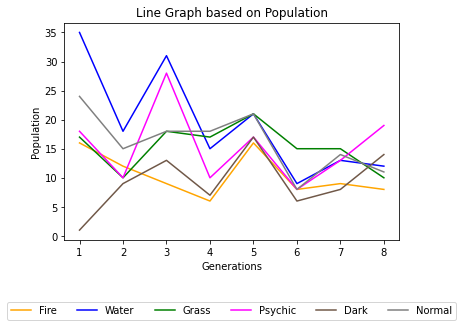

In [ ]:
#plotting both the population size of fire, water, grass, psychic, dark, and normal pokemon. 
fig, ax = plt.subplots()

# Creating plots based on Type
ax.plot(gen_fire_pokemon_pop['Generation'], gen_fire_pokemon_pop['Population Size'], label = "Fire", color = 'orange')
ax.plot(gen_water_pokemon_pop['Generation'], gen_water_pokemon_pop['Population Size'], label = "Water", color = 'blue')
ax.plot(gen_grass_pokemon_pop['Generation'], gen_grass_pokemon_pop['Population Size'], label = "Grass", color = 'green')
ax.plot(gen_psychic_pokemon_pop['Generation'], gen_psychic_pokemon_pop['Population Size'], label = "Psychic", color = 'magenta')
ax.plot(gen_dark_pokemon_pop['Generation'], gen_dark_pokemon_pop['Population Size'], label = "Dark", color = '#705848')
ax.plot(gen_normal_pokemon_pop['Generation'], gen_normal_pokemon_pop['Population Size'], label = "Normal", color = 'grey')

# Labeling
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.39), ncol=6)
ax.set_xlabel('Generations')
ax.set_ylabel('Population')
ax.set_title('Line Graph based on Population')
plt.show()

We can see that there is a trend that many pokemon type (in this graph) decrease during generation 5-6. Notice how grass types are only getting less and less representation throughout the ages. It is quite strange since it is one of the 3 main pokemon types that one can pick at the start. 

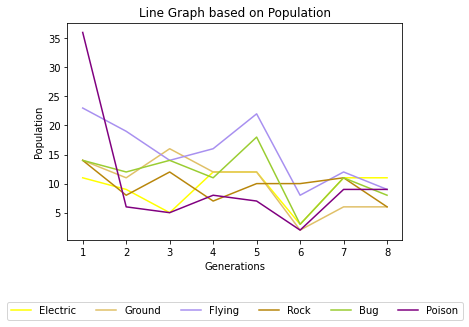

In [ ]:
#plotting both the population size of electric, ground, flying, rock, bug, and poison pokemon. 
fig, ax = plt.subplots()

# Creating plots based on Type
ax.plot(gen_electric_pokemon_pop['Generation'], gen_electric_pokemon_pop['Population Size'], label = "Electric", color = 'yellow')
ax.plot(gen_ground_pokemon_pop['Generation'], gen_ground_pokemon_pop['Population Size'], label = "Ground", color = '#E0C068')
ax.plot(gen_flying_pokemon_pop['Generation'], gen_flying_pokemon_pop['Population Size'], label = "Flying", color = '#A890F0')
ax.plot(gen_rock_pokemon_pop['Generation'], gen_rock_pokemon_pop['Population Size'], label = "Rock", color = 'darkgoldenrod')
ax.plot(gen_bug_pokemon_pop['Generation'], gen_bug_pokemon_pop['Population Size'], label = "Bug", color = 'yellowgreen')
ax.plot(gen_poison_pokemon_pop['Generation'], gen_poison_pokemon_pop['Population Size'], label = "Poison", color = 'purple')
# Labeling
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.39), ncol=6)
ax.set_xlabel('Generations')
ax.set_ylabel('Population')
ax.set_title('Line Graph based on Population')
plt.show()

The one that is super noticeable is how potent poison types were in generation 1, and then tanked down in representation throughout the ages. Once generation 7-8 arrived, it created a plateau and I find it super interesting since rock and electric are the only ones that does it in this graph. It is also weird that all types do tank down once generation 6 comes along here as well.  

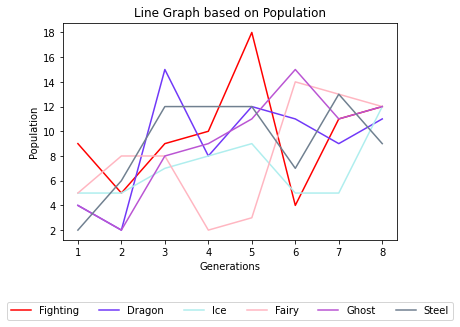

In [ ]:
#plotting both the population size of fighting, dragon, ice, fairy, ghost, steel pokemon. 
fig, ax = plt.subplots()

# Creating plots based on Type
ax.plot(gen_fighting_pokemon_pop['Generation'], gen_fighting_pokemon_pop['Population Size'], label = "Fighting", color = 'red')
ax.plot(gen_dragon_pokemon_pop['Generation'], gen_dragon_pokemon_pop['Population Size'], label = "Dragon", color = '#7038F8')
ax.plot(gen_ice_pokemon_pop['Generation'], gen_ice_pokemon_pop['Population Size'], label = "Ice", color = 'paleturquoise')
ax.plot(gen_fairy_pokemon_pop['Generation'], gen_fairy_pokemon_pop['Population Size'], label = "Fairy", color = 'lightpink')
ax.plot(gen_ghost_pokemon_pop['Generation'], gen_ghost_pokemon_pop['Population Size'], label = "Ghost", color = 'mediumorchid')
ax.plot(gen_steel_pokemon_pop['Generation'], gen_steel_pokemon_pop['Population Size'], label = "Steel", color = 'slategrey')


# Labeling
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.39), ncol=6)
ax.set_xlabel('Generations')
ax.set_ylabel('Population')
ax.set_title('Line Graph based on Population')
plt.show()

We can now see that as all types were tanking down, fairy and dragon-types were the only ones that were not decreasing at all. It makes sense that Fairy-types increasing since Fairy-types were first introduced in Generation 6. Once they were introduced, Pokemon/GameFreak later chose other pokemon to be in the Fairy-type from previous generations. We can also see that Ghost-types were also a type that did not decrease, but increase during that period. 

## Finding the count of one-types and two-types based on generations

In [ ]:
gen_one_type_pop = get_type_gen(one_type_pokemon)
gen_two_type_pop = get_type_gen(two_type_pokemon)

### One-type and Two-type Pokemon Graph

Comparing pokemon with one type against the other in terms of frequency via plots

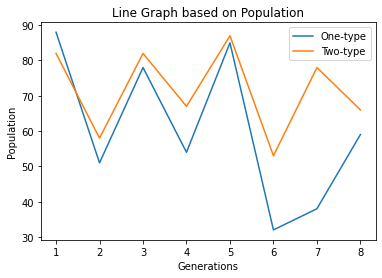

In [ ]:
#plotting both for all pokemon types. 
fig, ax = plt.subplots()

ax.plot(gen_one_type_pop['Generation'], gen_one_type_pop['Population Size'], label = "One-type")
ax.plot(gen_two_type_pop['Generation'], gen_two_type_pop['Population Size'], label = "Two-type")
ax.legend()
ax.set_xlabel('Generations')
ax.set_ylabel('Population')
ax.set_title('Line Graph based on Population')
plt.show()

It is quite suprising that the frequency between one and two type pokemon are relatively the same, but when it comes to generation 5-7, there has been a major decrease of one-type pokemon. This is something that I have notice when I played Pokemon, since it does seem that a lot of the new pokemon have two types. But we can see that from generation 7-8 there has been a increase of one-type pokemon. This is something that I can hope improve as time goes since the distribution amongst one and two-type pokemon should be about 50-50 or 60-40 where 60% should be an emphasis for two-type pokemon. 

# Visuals

## Pie Charts 

In [ ]:
##Creating a new function to not copy and paste it over and over
  ## Counts all the type 1 in the dataframe and be able to graph in pie chart

def get_type_counts(df):
  type_counts = df["Type 1"].append(df["Type 2"]).value_counts()
  return type_counts

In [ ]:
## Similar function but with the types and colors inside of plot_pie_chart
def plot_pie_chart(df):
    type_counts = df["Type 1"].append(df["Type 2"]).value_counts()
    total = sum(type_counts)
    labels = [f'{type_counts.index[i]} ({100 * type_counts[i] / total:.2f}%)' for i in range(len(type_counts))]
    type_colors = {'Fire':'orange', 'Water':'blue', 'Grass':'green', 'Electric':'yellow', 'Normal':'grey',
                  'Fighting':'red', 'Poison':'purple', 'Ground':'#E0C068', 'Flying':'#A890F0', 'Psychic':'magenta',
                  'Bug':'yellowgreen', 'Rock':'darkgoldenrod', 'Ghost':'mediumorchid', 'Dragon':'#7038F8', 'Dark':'#705848',
                  'Steel':'slategrey', 'Ice':'paleturquoise', 'Fairy': 'lightpink'}
    colors = [type_colors[type] for type in type_counts.index]
    plt.figure(figsize = (7.5,7.5))
    plt.pie(type_counts, labels=labels, autopct='%1.1f%%', colors=colors)
    plt.title('Pokemon Type Distribution')
    plt.show()

<ipython-input-27-cd0ea5d706e8>:3: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



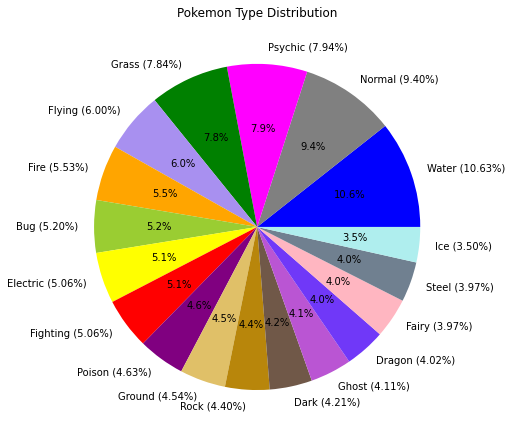

In [ ]:
plot_pie_chart(poke)

What I found very suprising was the idea that Water types have a big representation at a whopping 10.63%. I was expecting Grass, Water, and Fire to have a similar distribution amongst each other. But it does seem clear that there is more water types than grass, and fire. Shockingly fire is not even top 5 most frequent types dispite being the main 3 types to be selected at the beginning of the game as a starter pokemon. 

Now doing this for legendary pokemon

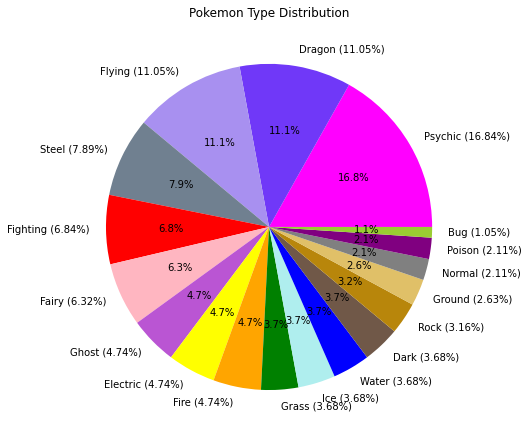

In [ ]:
plot_pie_chart(df_legend)

There is really something interesting in how Psychic types are prominent amoungst legendary pokemon. One hand it is not really suprising since Legendary pokemons are suppose to be entities that help create the world and the rules of nature. Think of Lunala and the three sacred treasures of Sinnoh  (Azelf, Mesprit, and Uxie) which represent the reincarnation of night/darkness and the freudian's superego, id, and ego respectively. 

What does suprise me however is the idea that there is 6.84% of legendary fighting type pokemon here. I would expect it to be lower compared to fairy types due to countless fairies told in urban legends/myths.

<ipython-input-33-cd0ea5d706e8>:3: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



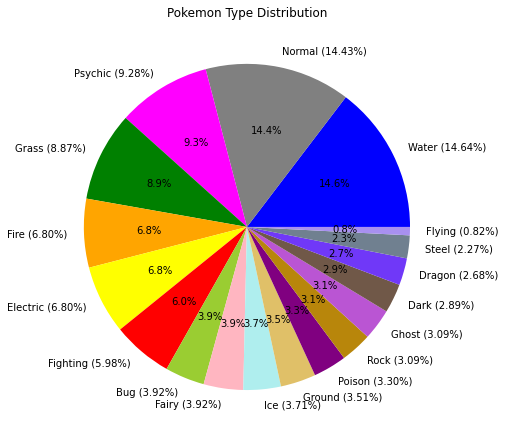

In [ ]:
## Seeing the most mono-type pokemon 
plot_pie_chart(one_type_pokemon)

It does not suprise me that Normal and water types are the most frequent pokemon. What does suprise me is how there is a low percentage of flying type pokemon. I assume more of based on how common it is to get a normal/flying type pokemon.

We can also check the amount of pokemon are in each category. We will get the sample size of each generation, as well as types, and the types that were in that generation. 

<ipython-input-27-cd0ea5d706e8>:3: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



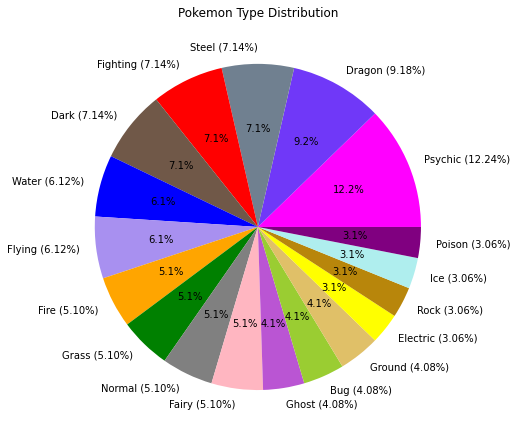

In [ ]:
## Seeing the what is the most used type for mega evolutions
plot_pie_chart(mega_poke)

In [ ]:
#type_colors = {'Fire':'orange', 'Water':'blue', 'Grass':'green', 'Electric':'yellow', 'Normal':'grey',
#                'Fighting':'red', 'Poison':'purple', 'Ground':'#E0C068', 'Flying':'#A890F0', 'Psychic':'magenta',
#                'Bug':'yellowgreen', 'Rock':'darkgoldenrod', 'Ghost':'mediumorchid', 'Dragon':'#7038F8', 'Dark':'#705848',
#                'Steel':'slategrey', 'Ice':'paleturquoise', 'Fairy': 'lightpink'}
#sequence1 = poke["Type 1"].value_counts().sort_values(ascending=False).index.tolist()
#sequence2 = poke["Type 2"].value_counts().sort_values(ascending=False).index.tolist()

#sankey(poke.dropna()["Type 1"], poke.dropna()["Type 2"], aspect=1,  fontsize=14, colorDict=type_colors)
#plt.title("Type 1 - Type 2", fontsize=20)
#plt.gcf().set_size_inches((18, 15))

## Will see if there is a way to use Plotly in colab

In [ ]:
## Getting the population size of each generation

# Getting the value of the sample size per generation
gen_size = poke.groupby('Generation').size()

# Creating a new dataframe based on the findings and indexing it by Generation
gen_size_df = pd.DataFrame({'Generation': gen_size.index, 'Population Size': gen_size})

print(gen_size_df)

            Generation  Population Size
Generation                             
1                    1              181
2                    2              111
3                    3              162
4                    4              121
5                    5              177
6                    6               85
7                    7              116
8                    8              105


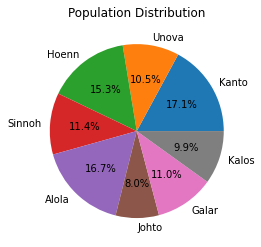

In [ ]:
## Pie chart for population size of based on generation/region

## Setting Generation column as the index 
gen_size_df.set_index('Generation', inplace = True)
gen_names = {1: 'Kanto', 2: 'Johto', 3: 'Hoenn', 4: 'Sinnoh', 
             5: 'Unova', 6: 'Kalos', 7: 'Alola', 8: 'Galar'}
 
# Creating pie chart 
plt.pie(gen_size_df['Population Size'], labels=[gen_names[x] for x in poke['Generation'].value_counts().index], autopct ='%1.1f%%')

plt.title('Population Distribution')

plt.show()

## This graph is rather silly. If I add more to the title, it'll give me an error " "None of ['Generation'] are in the columns"". 
## I have no idea why this occurs or how to fix it 
## I just have to copy+paste the same 'Generation' under set_index() and then it works again. It is very weird. 

In [ ]:
## Finding all combinations of all pokemon types 

two_type_pokemon
poke['Type'] = poke['Type 1']

poke.loc[poke['Type 2'].notnull(), 'Type'] = poke['Type'] + '/' + poke['Type 2']



In [ ]:
## Getting the size of each type in general
count_size = poke.groupby(['Type'])['Name'].count().reset_index(name = 'Count')

## I will be planning to use this for a visual
# Seperating them again in order to keep all three columns together

# Splitting into two columns with help of "/"
count_size[['Type 1', 'Type 2']] = count_size['Type'].str.split('/', expand = True)

print(count_size)

# Saving the code into csv file in order to use flourish. I want to create a chord diagram showcasing the diversity of pokemon types and combinations. 
  # I can code it but Flourish makes it easy, and Plotly does not want to run in Google Colab (How I am coding since I like the convenience of it).

count_size.to_csv('PokemonChord.csv', index = False)

              Type  Count Type 1    Type 2
0          Bug/Bug     19    Bug       Bug
1     Bug/Electric      4    Bug  Electric
2        Bug/Fairy      2    Bug     Fairy
3     Bug/Fighting      4    Bug  Fighting
4         Bug/Fire      2    Bug      Fire
..             ...    ...    ...       ...
191   Water/Poison      3  Water    Poison
192  Water/Psychic      6  Water   Psychic
193     Water/Rock      5  Water      Rock
194    Water/Steel      1  Water     Steel
195    Water/Water     71  Water     Water

[196 rows x 4 columns]


Chord Visual

In [ ]:
## Distribution amongst types

type_counts = two_type_pokemon.groupby(['Type 1', 'Type 2']).size()

type_counts.plot(kind='pie', figsize=(50, 25), autopct='%1.1f%%')

plt.title('Two-Type Pokémon Distribution') ## Pie chart has too much information. 

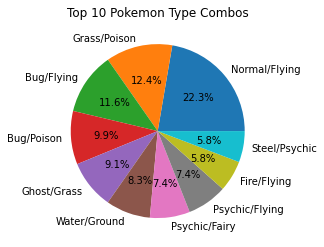

In [ ]:
## Getting the top 10 combinations instead
two_type_pokemon ## Using this due to it having all type 1 and type 2 pokemon

type_combination = two_type_pokemon.groupby(['Type 1', 'Type 2']).size().reset_index(name = 'Count')

top_10_combos = type_combination.sort_values('Count', ascending = False).head(10)

## Pie Chart Plot
plt.pie(top_10_combos['Count'], labels = top_10_combos['Type 1'] + '/' + top_10_combos['Type 2'], autopct = '%1.1f%%')
plt.title('Top 10 Pokemon Type Combos')
plt.show()

I am not suprised that Normal/Flying are the most populated type in pokemon, but I am suprised that Psychic/Fairy are amongst the top 10 pokemon typings. This is because Fairy types were the most recent typing introducted to the Pokemon series. While it was released 10 years ago, it is still amazing how many Psychic/Fairies there are in the world of Pokemon. 

I wanted to get use the whole pie chart, but it is not possible given the figsize as it  will just be too small to fit all possible type combinations. This is why I am using Flourish in order to show the chord chart of each type combination and how the distribution is below. 

In [ ]:
## Embeded Chord Diagram on Colab
## Link: https://public.flourish.studio/visualisation/13093059/

HTML('<iframe src="https://public.flourish.studio/visualisation/13093059/" width="700" height="720"></iframe>')

/usr/local/lib/python3.9/dist-packages/IPython/core/display.py:701: UserWarning:

Consider using IPython.display.IFrame instead



## Pokemon Stat Plots via Seaborn and Matplotlib

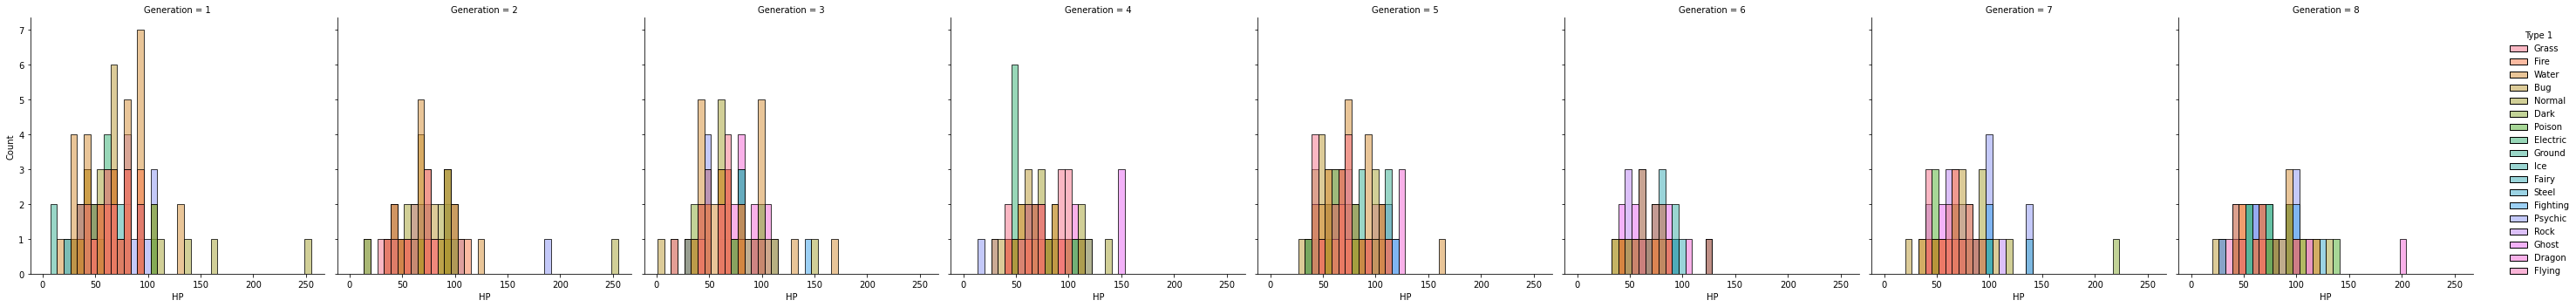

In [ ]:
## Displaying each HP distribtion among each type, then sorting it by generation.

sns.displot(data=poke, x="HP", hue="Type 1", col="Generation")

While this graph gives us the right information that we ask it for, but it is not the way that we would like to see. In order to change it, we can incorperate our data in another plot, and have less clutter. 

([<matplotlib.axis.XTick at 0x7fa1ea5beb20>,
 [Text(0, 0, 'Non-Legendary'), Text(0, 0, 'Legendary')])

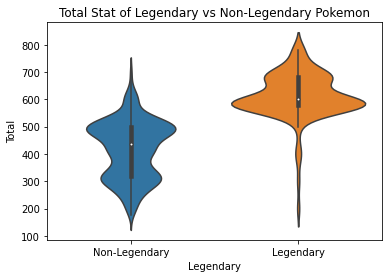

In [ ]:
## Display of how the Total stat for legendaries vs non-legendaries
  ## Violin plot will help us understand the frequency of each tick. 
      ## This allow us to see how many pokemon has 100 stats in corresponiding stat etc. 
plt.title('Total Stat of Legendary vs Non-Legendary Pokemon')
sns.violinplot(x='Legendary', y='Total', data=poke)
plt.xticks(ticks=[0, 1], labels=["Non-Legendary", "Legendary"]) ## Changing x-ticks to show which is non-legendary/legendary. 


([<matplotlib.axis.XTick at 0x7fa1ea72c640>,
 [Text(0, 0, 'Non-Legendary'), Text(0, 0, 'Legendary')])

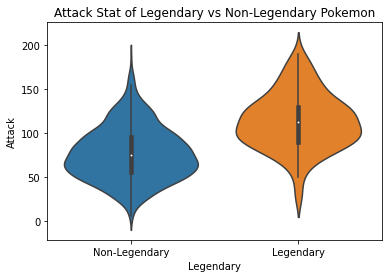

In [ ]:
# Display of how the attack stat for legendaries vs non-legendaries

plt.title('Attack Stat of Legendary vs Non-Legendary Pokemon')
sns.violinplot(x='Legendary', y='Attack', data=poke)
plt.xticks(ticks=[0, 1], labels=["Non-Legendary", "Legendary"])

([<matplotlib.axis.XTick at 0x7fa1ea74ddf0>,
 [Text(0, 0, 'Non-Legendary'), Text(0, 0, 'Legendary')])

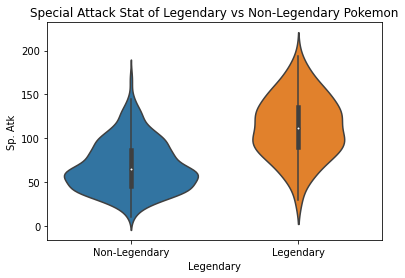

In [ ]:
## Display of how the attack stat for legendaries vs non-legendaries

plt.title('Special Attack Stat of Legendary vs Non-Legendary Pokemon')
sns.violinplot(x='Legendary', y='Sp. Atk', data=poke)
plt.xticks(ticks=[0, 1], labels=["Non-Legendary", "Legendary"])

([<matplotlib.axis.XTick at 0x7fa1ea661cd0>,
 [Text(0, 0, 'Non-Legendary'), Text(0, 0, 'Legendary')])

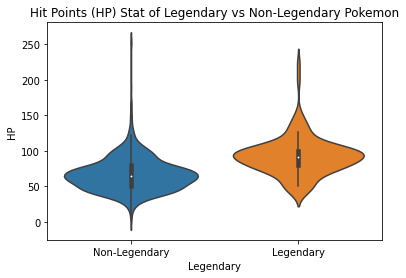

In [ ]:
## Display of how the HP stat for legendaries vs non-legendaries
plt.title('Hit Points (HP) Stat of Legendary vs Non-Legendary Pokemon')
sns.violinplot(x='Legendary', y='HP', data=poke)
plt.xticks(ticks=[0, 1], labels=["Non-Legendary", "Legendary"])

We can see a huge difference amongst legendary and non-legendary pokemon. The most prominent is by the overall total stats of the pokemon, as well as the (special) attack stats of the pokemon. It is not surprising given the idea that legendary pokemon are suppose to be entities that represent aspects of nature and principles that we humans cannot control. 

We can also try to create a scatter matrix in order to see a better read in how all variables correlate with one another. 

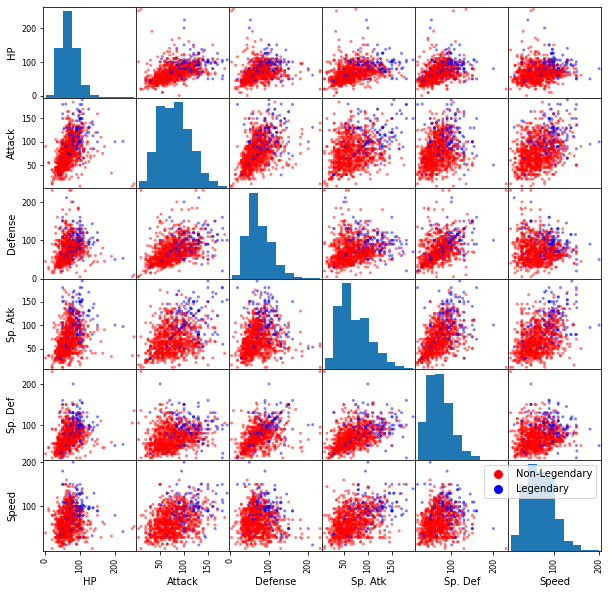

In [ ]:
poke_subset = poke[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]] ## Getting values that are only values
legend_colors = poke['Legendary'].map({0: 'red', 1: 'blue'}) ## We show which red is non-legendary, and blue is a legendary pokemon

scatter_matri = pd.plotting.scatter_matrix(poke_subset, figsize = (10,10), alpha = 0.5, c = legend_colors)
## Creating a custom legend for scatter_matrix 
legend_elements = [plt.Line2D([0], [0], marker = 'o', color = 'w', label = 'Non-Legendary',
                   markerfacecolor = 'Red', markersize = 10),
                   plt.Line2D([0], [0], marker = 'o', color = 'w', label = 'Legendary',
                   markerfacecolor = 'Blue', markersize = 10)]
plt.legend(handles =legend_elements, loc = 'best') ## I cannot move it to the most right column of the scatter plot
plt.show()

We can also create a correlation heatmap in order to see how much each variable impacts more with others. 

I am not suprised in how high legendary stats are naturally since they are suppose to be stronger than their non-legendary counterparts. What does suprise me is how many more non-legendary pokemon are there compared to legendary pokemon. Of course the Pokemon company creates on average 14 legendary per 90+ new pokemon per region. But it is great to see in a graph how different each cluster is. What we can do now is create a cluster and seeing if we can really differentiate legendary to non-legendary pokemon. We can also see if there is a way to differentiate mega evolution pokemon from the other two subset of pokemon via clustering. 

I am not really suprised that legendary pokemon will have higher stats compared to their non-legendary counter parts. What I would like to look is the following: As time goes on, do the stats of non-legendary types get closer to legendaries?

# Calculating the Mean of Each Stat Based on Generation. 

In [ ]:
## Creating a list for all the stats columns
stats_list = ['Total', 'HP' ,'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [ ]:
# Calculating the mean of each stat based on generation
non_mean_stats = df_nonleg.groupby('Generation').mean()[stats_list] # Creating a new df in order to recall it for other things

non_mean_stats.head(7)

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Generation,,,,,,,
1,416.121053,64.084211,75.721053,70.436842,67.757895,67.268421,70.957895
2,411.150943,69.707547,71.075472,72.660377,64.896226,72.367925,60.443396
3,408.166667,64.534722,76.597222,69.638889,69.020833,65.611111,62.763889
4,437.879630,69.740741,79.620370,75.074074,71.620370,74.018519,67.805556
5,419.012346,69.938272,79.648148,70.166667,67.370370,65.956790,65.932099
6,418.298701,66.636364,71.636364,75.896104,68.389610,71.935065,63.805195
7,415.382353,64.897059,78.808824,72.294118,66.926471,71.073529,61.367647


We can see that this is not the case as each generation stats for non-legendary types are very similar instead of vastly different. 

In [ ]:
## Getting the mean of each stat based upon generation and type 1 & 2
non_mean_stats_type = df_nonleg.groupby(['Generation', 'Type 1', 'Type 2']).mean()[stats_list].fillna(poke.mean())

non_mean_stats_type.head()

<ipython-input-44-b096ffb3817a>:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Total         HP      Attack    Defense  \
Generation Type 1 Type 2                                                 
1          Bug    Bug     300.000000  53.333333   58.333333  63.333333   
                  Flying  498.333333  65.000000  103.333333  83.333333   
                  Grass   345.000000  47.500000   82.500000  67.500000   
                  Poison  340.833333  57.500000   70.000000  45.000000   
           Dark   Dark    365.000000  52.500000   47.500000  47.500000   

                            Sp. Atk    Sp. Def       Speed  
Generation Type 1 Type 2                                    
1          Bug    Bug     33.333333  38.333333   53.333333  
                  Flying  70.000000  83.333333   93.333333  
                  Grass   52.500000  67.500000   27.500000  
                  Poison  39.166667  55.833333   73.333333  
           Dark   Dark    62.500000  52.500000  102.500000

I decided to add use fillna(poke.mean()) because it will help us keep the overall distribution of the data. 

Will see if there is a way to remove the first row of each subset of type since it is Type 1 == Type 2 

In [ ]:
# Calculating the legendary part with just generation
legend_mean_stats = df_legend.groupby('Generation').mean()[stats_list]
legend_mean_stats.head(8)

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Generation,,,,,,,
1,663.333333,98.000000,120.833333,89.166667,141.166667,101.666667,112.500000
2,620.000000,103.400000,99.000000,99.000000,99.000000,119.600000,100.000000
3,648.888889,81.666667,118.333333,107.222222,126.111111,113.888889,101.666667
4,634.615385,100.846154,109.846154,103.538462,116.153846,103.538462,100.692308
5,618.666667,96.133333,120.266667,90.733333,117.800000,92.066667,101.666667
6,642.500000,87.500000,125.250000,101.375000,131.625000,112.625000,84.125000
7,561.600000,88.666667,106.400000,94.500000,102.700000,85.566667,83.766667
8,601.666667,98.619048,113.333333,95.000000,96.857143,92.619048,105.238095


In [ ]:
# Calculating the legendary part with its generation, type 1 & type 2
legend_mean_stats_type = df_legend.groupby(['Generation', 'Type 1', 'Type 2']).mean()[stats_list].fillna(poke.mean())

Same logic as before

In [ ]:
## Calculating all pokemon stats to see if there is a huge difference in all 3
mean_stats = poke.groupby('Generation').mean()[stats_list]

In [ ]:
## Calculating all pokemons stats to see if there is a difference amongsts its generation, type 1 & 2. 
mean_stat_type = poke.groupby(['Generation', 'Type 1', 'Type 2']).mean()[stats_list]

In [ ]:
# Calculating the difference between all stats between legendary vs non-legendary pokemon (on average and based on generation)
diff_stats = (legend_mean_stats - non_mean_stats)

# Calculating the percentage of that difference
diff_stats_per = 100*(diff_stats/non_mean_stats).round(3)

print(diff_stats_per)

            Total    HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
Generation                                                       
1            52.7  48.8    49.7     26.2     89.7     52.8   50.3
2            50.8  48.3    39.3     36.3     52.6     65.3   65.4
3            59.0  26.5    54.5     54.0     82.7     73.6   62.0
4            44.9  44.6    38.0     37.9     62.2     39.9   48.5
5            47.6  37.5    51.0     29.3     74.9     39.6   54.2
6            53.6  31.3    74.8     33.6     92.5     56.6   31.8
7            35.2  36.6    35.0     30.7     53.5     20.4   36.5
8            43.7  46.3    45.3     34.9     37.9     32.7   67.0


In [ ]:
#Calculating the difference between all stats between the overall pokedex (the log) vs non-legendary pokemon (on average and based on types)
diff_stats_type = (legend_mean_stats_type - non_mean_stats_type)

## diff_stats_type = diff_stats_type.dropna() ## Attempts to drop all values that contain NaN, but cannot drop some values 

# Calculate the percentage of that difference 

diff_stats_per_type = (100*(diff_stats_type/non_mean_stats_type)).round(3)

print(diff_stats_per_type)

## This code will have more NaN than percentages due to not having enough legendaries that have one or an odd typing
  ## Ex. There is no mono-bug type pokemon, nor bug flying type legendary pokemon etc. 

In [ ]:
# Calculating the difference between all stats between all pokemon vs non-legendary pokemon (on average and based on generation/typing)
    ## one of the ways to combat the NaN errors from above. 
diff_stats3 = (mean_stat_type - non_mean_stats)

# Calculating the percentage of that difference
diff_stats_per3 = 100*(diff_stats3/mean_stat_type).round(3)

## I would like to see a significant increase such as more than 29% 
print(diff_stats_per3)


                          Total    HP  Attack  Defense  Sp. Atk  Sp. Def  \
Generation Type 1 Type 2                                                   
1          Bug    Bug     -38.7 -20.2   -29.8    -11.2   -103.3    -75.5   
                  Flying   16.5   1.4    26.7     15.5      3.2     19.3   
                  Grass   -20.6 -34.9     8.2     -4.4    -29.1      0.3   
                  Poison  -22.1 -11.5    -8.2    -56.5    -73.0    -20.5   
           Dark   Dark    -14.0 -22.1   -59.4    -48.3     -8.4    -28.1   
...                         ...   ...     ...      ...      ...      ...   
8          Water  Dragon   16.6  24.0    11.4     28.8      0.8     14.7   
                  Ghost    20.6  43.0    28.8     -9.6     13.2      9.0   
                  Ice      16.6  24.0    11.4     28.8     13.2     24.2   
                  Rock     13.2  24.0    30.7     20.8    -44.7     -0.3   
                  Water    -9.2 -21.8   -10.0    -37.9      2.7    -47.3   

           

## Alolan and Galar vs Original variants comparision



In [ ]:
mean_alolan_vari = Alola_pokemon.mean()
mean_alolan_vari.drop(['Legendary', 'Generation', '#'], inplace = True) # Dropping the variables that are not needed.
#print(mean_alolan_vari)

In [ ]:
mean_galar_vari = Galar_pokemon.mean()
mean_galar_vari.drop(['Legendary', 'Generation', '#'], inplace = True)
# print(mean_galar_vari)

In [ ]:
mean_non_alolan = non_alolan.mean()
mean_non_alolan.drop(['Legendary', 'Generation', '#'], inplace = True) ## Doing the same for non-variants

In [ ]:
mean_non_galar = non_galar.mean()
mean_non_galar.drop(['Legendary', 'Generation', '#'], inplace = True)

In [ ]:
# Calculating the difference between all stats between Orignial pokemon vs variants of the orignial (Alolan first)
diff_stats4 = (mean_non_alolan - mean_alolan_vari)

# Calculating the percentage of that difference
diff_stats_per4 = 100*(diff_stats4/mean_non_alolan).round(3)

## I would like to see a significant increase such as more than 29% 
print(diff_stats_per4)


Total      0.1
HP        -1.9
Attack     2.4
Defense   -2.7
Sp. Atk    1.6
Sp. Def   -2.7
Speed      2.9
dtype: float64


In [ ]:
# Calculating the difference between all stats between Orignial pokemon vs variants of the orignial (Galar)
diff_stats5 = (mean_non_galar - mean_galar_vari)

# Calculating the percentage of that difference
diff_stats_per5 = 100*(diff_stats5/mean_non_galar).round(3)

## I would like to see a significant increase such as more than 29% 
print(diff_stats_per5)

Total      -2.5
HP         -8.0
Attack    -18.1
Defense    -0.6
Sp. Atk     9.5
Sp. Def     0.8
Speed       1.2
dtype: float64


We can conclude that the difference between legendary and non-legendary pokemon is resonably high. This should not be suprising due to how powerful they should be compared to regular pokemon (as well as the sample size playing a big role in the difference of stats). What brings a tear in my eyes is the idea that we do not have the amount of how different it is between each typing. What we can possibly do is create statements in order to prevent NaN values from coming. I assume they are there because there are some types combinations that are not there for Legendary pokemon yet, or the other way around for non-legendary. I will try to see if I can do that since if I only include pokemon with one type and not the ones with two types then it will skew the data a lot. This is because many legendary pokemon nowadays are often two types. 

When comparing original pokemon to variants from other regions, on average, they are relatively the same. This is actually great since normally power creep is a relative huge thing to do in gaming in today's world. What is fascinating is the idea that Galarian pokemon, on average, have higher attack stats than those that are not from Galar. Aside from that, we can assume that the changes are pretty negligible since the second highest value is Special Attack, which is more potent in pokemon that are not in Galar. 

# Line Plots based on Pokemon Stats via GGplot

We can see that Legendary pokemons are in a league of its own, which makes sense after all. It makes sense because they are suppose to represent embodiments of natural events or phenomenons in the pokemon world. The next thing to do can be to plot non-legendary and legendary pokmeon and to see how they go up against one another. 

<Axes: xlabel='Generation'>

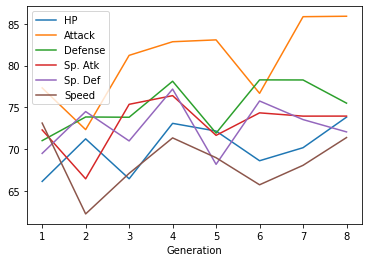

In [ ]:
## Plotting the overrall mean of each pokemon's stats grouped up based on their generation
pokemon_stats_by_generation = poke.groupby('Generation').mean()[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
pokemon_stats_by_generation.plot.line()

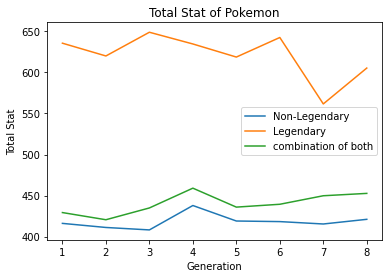

In [ ]:
##Plotting the Total Stat

non_mean_stats['Total'].plot()
legend_mean_stats['Total'].plot()
mean_stats['Total'].plot()

plt.title('Total Stat of Pokemon')
plt.legend(['Non-Legendary', 'Legendary', 'combination of both'])
plt.xlabel('Generation')
plt.ylabel('Total Stat')
plt.show()

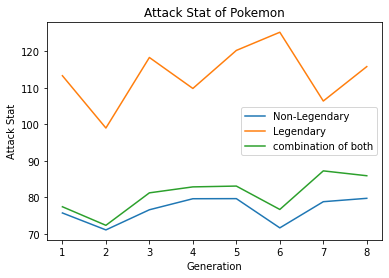

In [ ]:
##Plotting the Attack Stat

non_mean_stats['Attack'].plot()
legend_mean_stats['Attack'].plot()
mean_stats['Attack'].plot()

plt.title('Attack Stat of Pokemon')
plt.legend(['Non-Legendary', 'Legendary', 'combination of both'])
plt.xlabel('Generation')
plt.ylabel('Attack Stat')
plt.show()

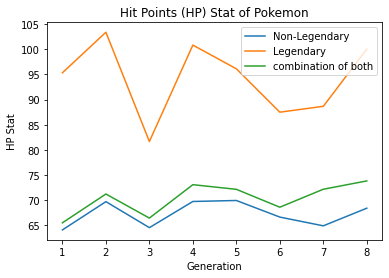

In [ ]:
##Plotting the HP Stat

non_mean_stats['HP'].plot()
legend_mean_stats['HP'].plot()
mean_stats['HP'].plot()

plt.title('Hit Points (HP) Stat of Pokemon')
plt.legend(['Non-Legendary', 'Legendary', 'Combination of Both'])
plt.xlabel('Generation')
plt.ylabel('HP Stat')
plt.show()

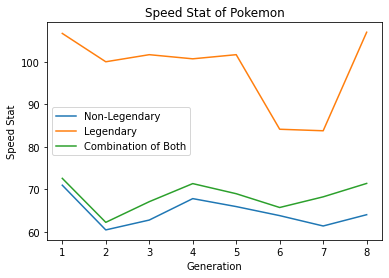

In [ ]:
## Plotting the Speed Stat

non_mean_stats['Speed'].plot()
legend_mean_stats['Speed'].plot()
mean_stats['Speed'].plot()

plt.title('Speed Stat of Pokemon')
plt.legend(['Non-Legendary', 'Legendary', 'Combination of Both'])
plt.xlabel('Generation')
plt.ylabel('Speed Stat')
plt.show()

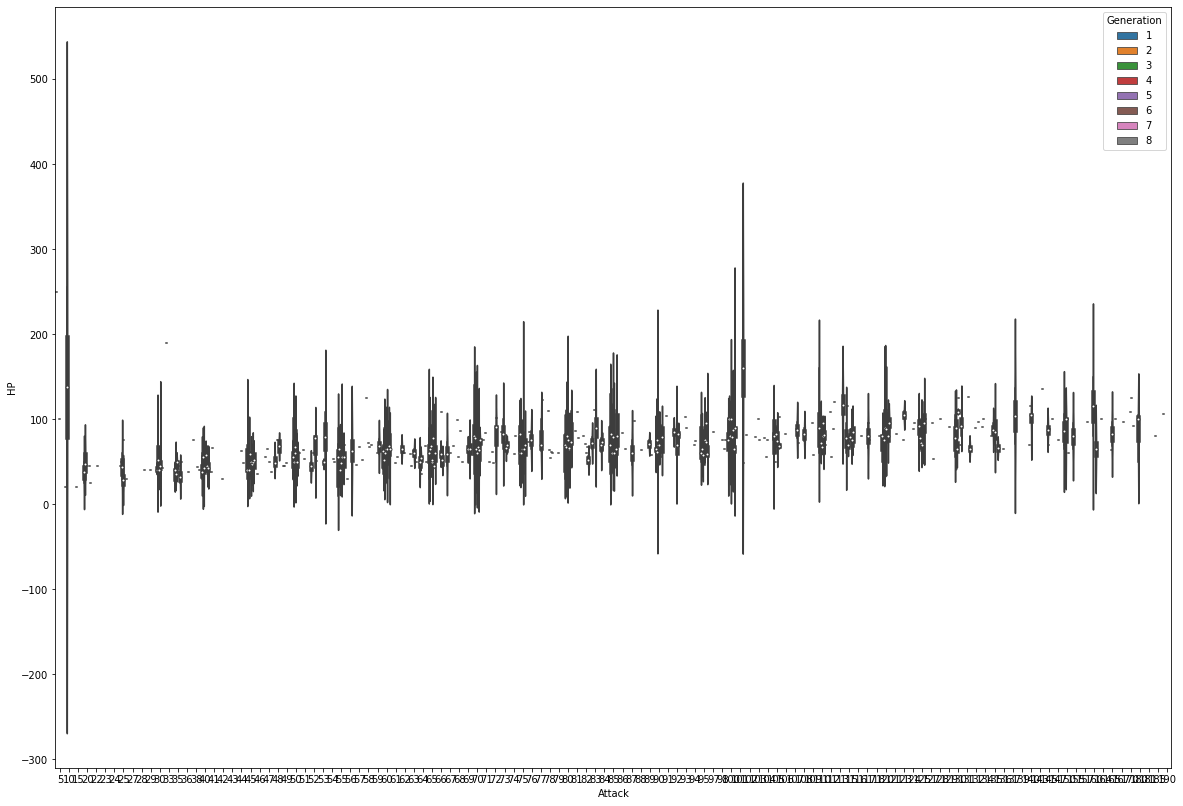

In [ ]:
plt.figure(figsize=(20,14))
sns.violinplot(data = poke, x = "Attack", y = "HP" , hue = "Generation")

This plot seems to have too many values to consider. What I will do in this is create a multiple plots for each type of pokemon, then sort them by generations. I also want to see if I find some sort of consistent pattern in stats of pokemon as time goes on. 

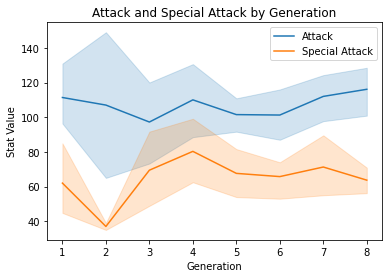

In [ ]:
## I will use a line plot instead of a boxplot to better showcase the difference between attack and special attack. 
## I would like to see if there is a noticable difference in distribution of attack 

sns.lineplot(x='Generation', y='Attack', data=fighting_pokemon, label = "Attack")
sns.lineplot(x='Generation', y='Sp. Atk', data=fighting_pokemon, label = "Special Attack")


plt.xlabel("Generation")
plt.ylabel("Stat Value")
plt.title("Attack and Special Attack by Generation")


plt.show()

The most bizzare message from this plot is the idea that generation 2's fighting type pokemon had a massive nose dive when it came to special attack, making it one of the few regions to showcase that each generation may focus on a certain stat. It is something to look into more as well as to see if there is some correlation between stats. 

# Boxplots of Pokemon Stats

As we go through this Notebook, one may see that I am a big fan of Boxplots. This is because of how nicely illustrated they are and how much infromation can extract from it. It is also easy to edit them and make them unique in their own way. 

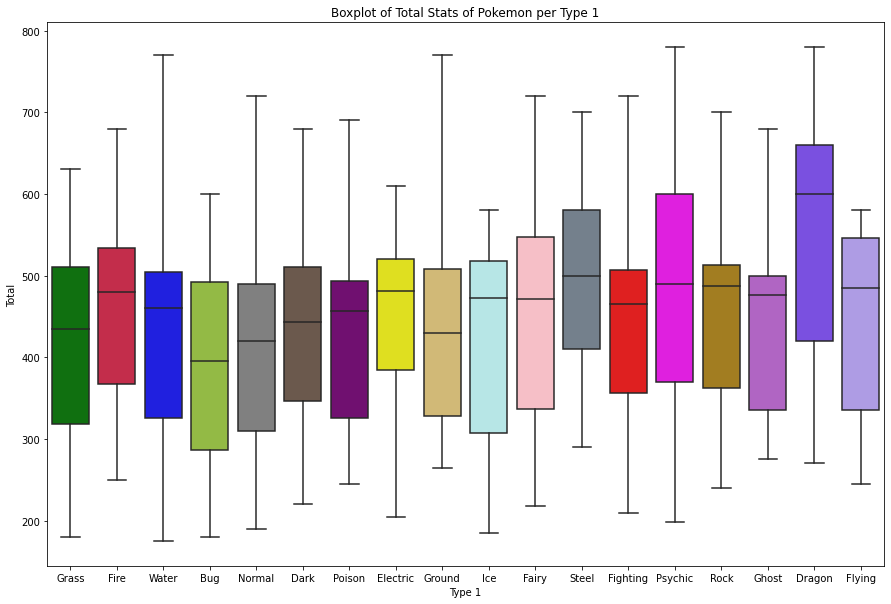

In [ ]:
## Plotting the poke dataframe based on types
type_colors = {'Fire':'crimson', 'Water':'blue', 'Grass':'green', 'Electric':'yellow', 'Normal':'grey',
                  'Fighting':'red', 'Poison':'purple', 'Ground':'#E0C068', 'Flying':'#A890F0', 'Psychic':'magenta',
                  'Bug':'yellowgreen', 'Rock':'darkgoldenrod', 'Ghost':'mediumorchid', 'Dragon':'#7038F8', 'Dark':'#705848',
                  'Steel':'slategrey', 'Ice':'paleturquoise', 'Fairy': 'lightpink'}

plt.figure(figsize=(15,10))
plt.title('Boxplot of Total Stats of Pokemon per Type 1')
figure = sns.boxplot(x = "Type 1", y = 'Total', data = poke, palette = type_colors)

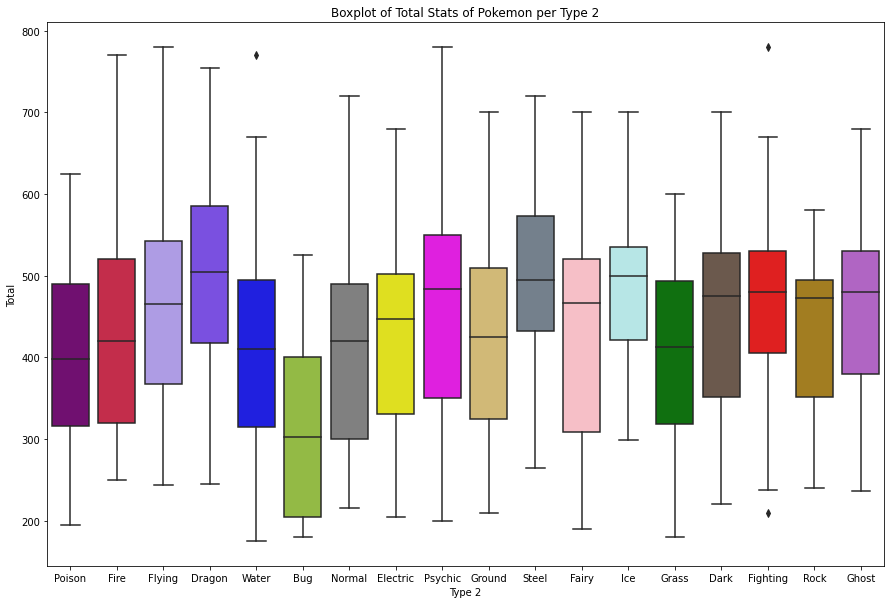

In [ ]:
## Plotting the poke dataframe based on types
type_colors = {'Fire':'crimson', 'Water':'blue', 'Grass':'green', 'Electric':'yellow', 'Normal':'grey',
                  'Fighting':'red', 'Poison':'purple', 'Ground':'#E0C068', 'Flying':'#A890F0', 'Psychic':'magenta',
                  'Bug':'yellowgreen', 'Rock':'darkgoldenrod', 'Ghost':'mediumorchid', 'Dragon':'#7038F8', 'Dark':'#705848',
                  'Steel':'slategrey', 'Ice':'paleturquoise', 'Fairy': 'lightpink'}

plt.figure(figsize=(15,10))
plt.title('Boxplot of Total Stats of Pokemon per Type 2')
figure = sns.boxplot(x = "Type 2", y = 'Total', data = poke, palette = type_colors)

([<matplotlib.axis.XTick at 0x7fe13be321f0>,
 [Text(0, 0, 'Kanto'),
  Text(1, 0, 'Johto'),
  Text(2, 0, 'Hoenn'),
  Text(3, 0, 'Sinnoh'),
  Text(4, 0, 'Unova'),
  Text(5, 0, 'Kalos'),
  Text(6, 0, 'Alola'),
  Text(7, 0, 'Galar')])

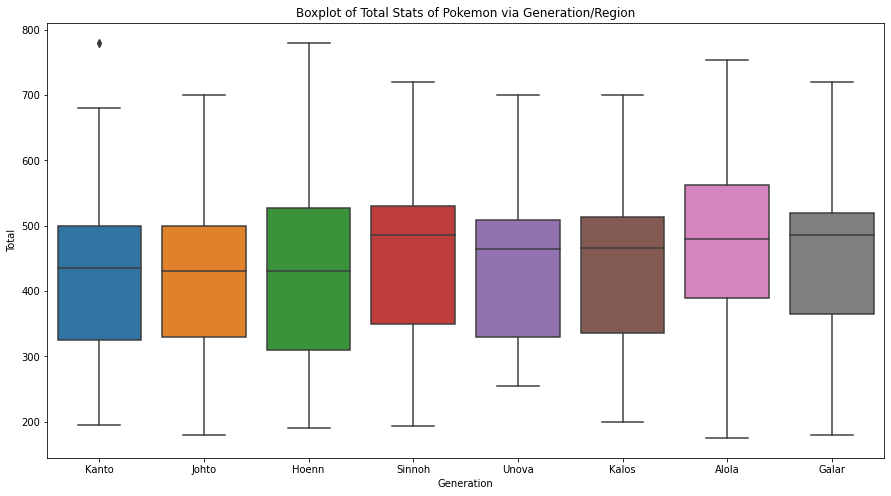

In [ ]:
## Plotting the poke dataframe based on generations
region_labels = ['Kanto', 'Johto', 'Hoenn', 'Sinnoh', 'Unova', 'Kalos', 'Alola', 'Galar']

plt.figure(figsize=(15,8))
plt.title('Boxplot of Total Stats of Pokemon via Generation/Region')
figure = sns.boxplot(x = "Generation", y = 'Total', data = poke)
plt.xticks(range(len(region_labels)), region_labels)

In [ ]:
## Find out which pokemon is the biggest outlier. I assume it would be Mewtwo
  ## This dataset contains mega evolutions. Mega evolutions are essentially a temporary change to a pokemon's apperance and strength. 
  ## This effect last until the end of a pokemon fight. It is no suprise that Mewtwo X, and Y have high stats compared to other pokemon.

value = poke[poke['Total'] > 700]['Name'].tolist()

if len(value) > 0:
  print(value[0])

MewtwoMega Mewtwo X


We will be doing a bit of statistical analysis when it comes to regions and how each type has developed on average. I would like to see if each type has "specialized" a stat as time goes on. For example, I would like to see if fighting types will have higher stats on attack (on average) for each new generation. 

In order to see this we will need to see if wether or not there is a statistical signifance of a change in values. We can achieve this with the help of ANOVA (analysis of variance). This will help us with seeing if the each generation of pokemon is increasing in a maner that can documented/stated. 

Let's do fighting types as an example of this. 

([<matplotlib.axis.XTick at 0x7f2ac1305c70>,
 [Text(0, 0, 'Kanto'),
  Text(0, 0, 'Johto'),
  Text(0, 0, 'Hoenn'),
  Text(0, 0, 'Sinnoh'),
  Text(0, 0, 'Unova'),
  Text(0, 0, 'Kalos'),
  Text(0, 0, 'Alola'),
  Text(0, 0, 'Galar')])

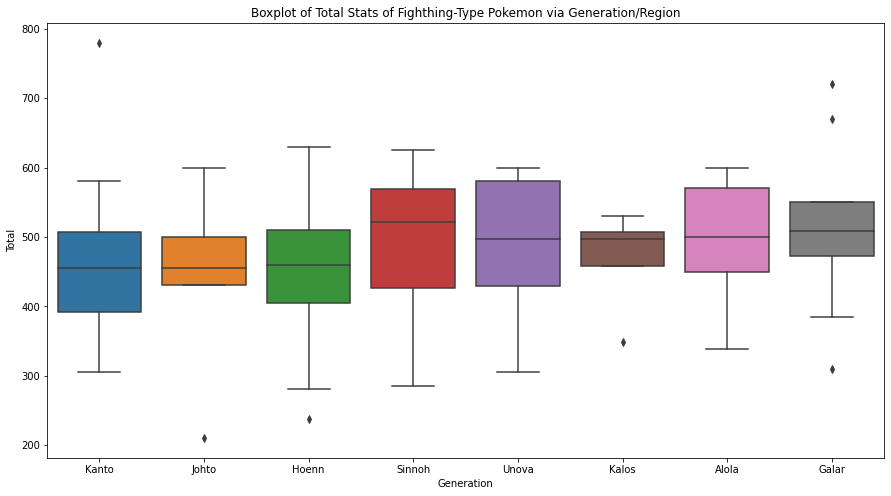

In [ ]:
## Box plot to show total stats of Fighting-type Pokemon
region_labels = ['Kanto', 'Johto', 'Hoenn', 'Sinnoh', 'Unova', 'Kalos', 'Alola', 'Galar']

plt.figure(figsize=(15,8))
plt.title('Boxplot of Total Stats of Fighthing-Type Pokemon via Generation/Region')
figure = sns.boxplot(x = "Generation", y = 'Total', data = fighting_pokemon)
plt.xticks(range(len(region_labels)), region_labels)

It does seem that the distribution of fighting type pokemon has some differences by generation. What makes this interesting is how Johto and Kalos have a small sample size due to their boxplots not having a lower range.

([<matplotlib.axis.XTick at 0x7fe13c0b7250>,
 [Text(0, 0, 'Kanto'),
  Text(1, 0, 'Johto'),
  Text(2, 0, 'Hoenn'),
  Text(3, 0, 'Sinnoh'),
  Text(4, 0, 'Unova'),
  Text(5, 0, 'Kalos'),
  Text(6, 0, 'Alola'),
  Text(7, 0, 'Galar')])

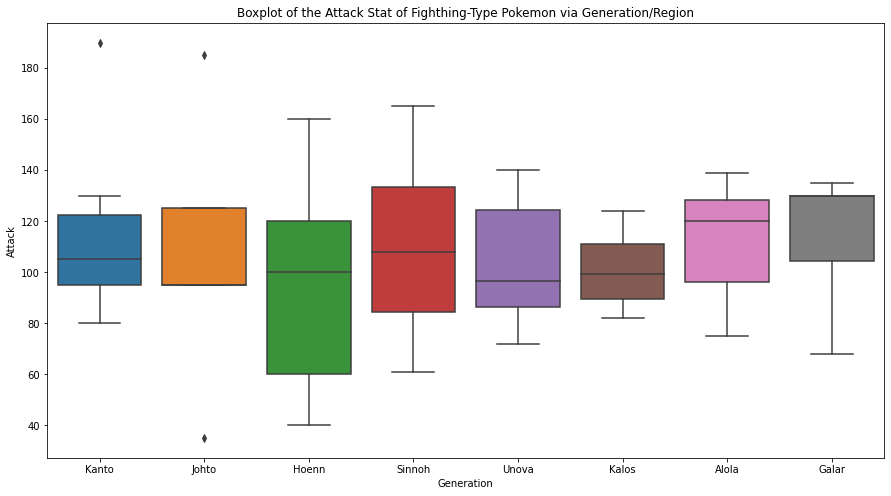

In [ ]:
## Creating a boxplot showing the attack stats based on region (ordered)
region_labels = ['Kanto', 'Johto', 'Hoenn', 'Sinnoh', 'Unova', 'Kalos', 'Alola', 'Galar']

plt.figure(figsize=(15,8))
plt.title('Boxplot of the Attack Stat of Fighthing-Type Pokemon via Generation/Region')
figure = sns.boxplot(x = "Generation", y = 'Attack', data = fighting_pokemon)
plt.xticks(range(len(region_labels)), region_labels)

# Correlation Heatmap Plot

Here we have a plot the demonstrates that there is a difference between attack and special attack stats. We can see an interesting effect where generations 3 and 4 have a very similar stat value. I am suprised by that since I would've assumed that it would just be a "When one goes up, the other will go down" type of situations. 

What we can do now is see if there is a statistical difference in fighting types throughout the generations. This will help us understand how different each generation was, and if there was a huge shift in stat bumps. 

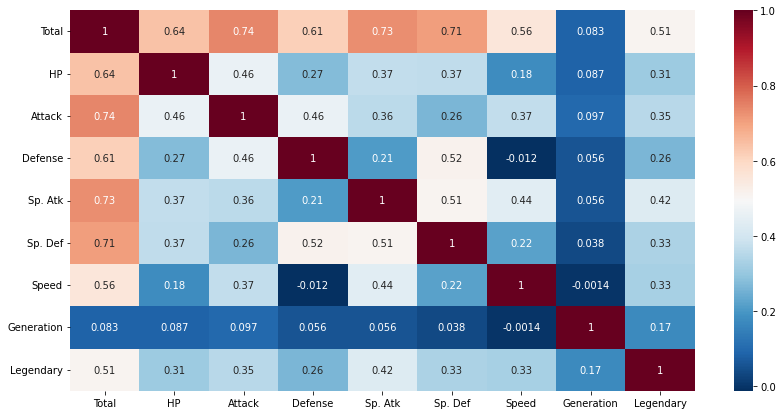

In [ ]:
## Seeing the heatmap for pokemon's correlation 
corrpokemon = poke.corr(method = 'pearson') ## This will help us find a correlation between x & y (between two variables) and help us create a heatmap
plt.figure(figsize=(14,7)) ## seeing the figure better
## Eliminating the 1st row and column 
corrpokemon = corrpokemon.iloc[1:,1:] ## There is no reason to have correaltion between pokedex entry and other variables, it carries no weight. 

sns.heatmap(corrpokemon, annot = True, cmap='RdBu_r')
plt.show()

Here in this heatmap, we can see that there is little to no correlation from one another. What we can see is that Speacial Attack and Attack are near identical whne it comes to correlation for Total. I found this pretty obvious since I was expecting the attack stats to fall simialrly overall for all pokemon. What I was facinated about is that Defense and Special Defense is a different sotry due to bothing being about .10 difference from one another in correlation between the Total stat. 

# T-test of One-Type vs Two-Type Pokemon

In order to compare which type is better than the other, we need to conduct a T-test first. A T-test is used in order to determine the difference between two groups and see if the means of both groups are stastistcally significant. In order for this to happen, we must need know if the variances are equal as well as the data being normally distributed. 

In [ ]:
stats_list = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [ ]:
# Two-sample t-test (with modifications from previous DataFrames)
  # Modifying in order to get just the stats
one_type_pokemon_t = one_type_pokemon[stats_list]
two_type_pokemon_t = two_type_pokemon[stats_list]
t_stat, p_value = stats.ttest_ind(two_type_pokemon_t,one_type_pokemon_t) # I do not like negative numbers, so we are doing this in this format.



# Print results 
print('Stat:', stats_list)
print('T-Statistics:',t_stat)
print('P-value:',p_value)


Stat: ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
T-Statistics: [7.16062557 2.7630357  4.86487657 6.80323444 5.33803898 5.203043
 3.00512034]
P-value: [1.50259856e-12 5.82614571e-03 1.31944991e-06 1.71043884e-11
 1.14984944e-07 2.35437305e-07 2.71743615e-03]


We can see that most of the values are statistically significant besides the Attack Stat attribute. This means that this is unlikely caused by chance, and  shows that there is a difference between pokemon with one-type and pokemon two-type. The T-statistics helps us understand in this ocassion is the difference between the two means of each population. If we look at purely the total stats, we can that there is a relative big gap in terms of the T-statistic (compared to the other stats, a T-stat of 7.16 is pretty big), and a humongous statistical difference amongst the total stat when it comes to P-value. This means there is evidence that pokemon with two-types and one-type have different in all attribute scores.

# Testing the (ANalysis Of VAriance) ANOVA of Each Pokemon Type Grouped By Generation


The premise of ANOVA is quite hard to understand at first, but once implementing it, it becomes quite easy to know! ANOVA is a statistical method that enable us to find out if the means of two or more groups are statistically different from one another. This can help us compare different categorical data to one another as well as seeing the effects of different treatments. For this case, we will be using it for categorical data since we want to see if each type has a distinct stat from one another by grouping them by generation or the region that the pokemon was introduced. 

It is something that I was always curious about: Do each type's stat varies from region to region, or is it very similar to one another?

Compared to T-tests, ANOVA is used when comparing three or more groups at a time in order to find out if there is a stastistical significance.

In [ ]:
region_labels = ['Kanto', 'Johto', 'Hoenn', 'Sinnoh', 'Unova', 'Kalos', 'Alola', 'Galar']

In [ ]:
gen_to_region = {1: "Kanto", 2:"Johto", 3:"Hoenn",
                 4:"Sinnoh", 5:"Unova", 6:"Kalos",
                 7:"Alola", 8:"Galar"}

In [ ]:
# Grouping data by generation
grouped_df = poke.groupby('Generation')

# Loop through the list of stats
for stat in stats_list:
    f_value, p_value = stats.f_oneway(*[group[stat] for _, group in grouped_df])
    print(f"ANOVA results for {stat}: F-value={f_value:.2f}, p-value={p_value:.4f}")


ANOVA results for Total: F-value=1.41, p-value=0.1966
ANOVA results for HP: F-value=1.87, p-value=0.0704
ANOVA results for Attack: F-value=2.58, p-value=0.0122
ANOVA results for Defense: F-value=1.22, p-value=0.2884
ANOVA results for Sp. Atk: F-value=1.05, p-value=0.3920
ANOVA results for Sp. Def: F-value=1.77, p-value=0.0890
ANOVA results for Speed: F-value=1.75, p-value=0.0949


Here we have a ANOVA test conducted with all the pokemon in mind. What is quite interesting is how Attack is statistically sigficant for per region/generation. This is something that I did not expect as there are so many pokemon and types that I would assume the p-values will be greater than 0.05. We can see that the F-values are relatively low, this is something that we cannot control/manipulate as the grouped_df function is all of the pokemon from Kanto to Galar. 

([<matplotlib.axis.XTick at 0x7fc78c3b8130>,
 [Text(0, 0, 'Kanto'),
  Text(1, 0, 'Johto'),
  Text(2, 0, 'Hoenn'),
  Text(3, 0, 'Sinnoh'),
  Text(4, 0, 'Unova'),
  Text(5, 0, 'Kalos'),
  Text(6, 0, 'Alola'),
  Text(7, 0, 'Galar')])

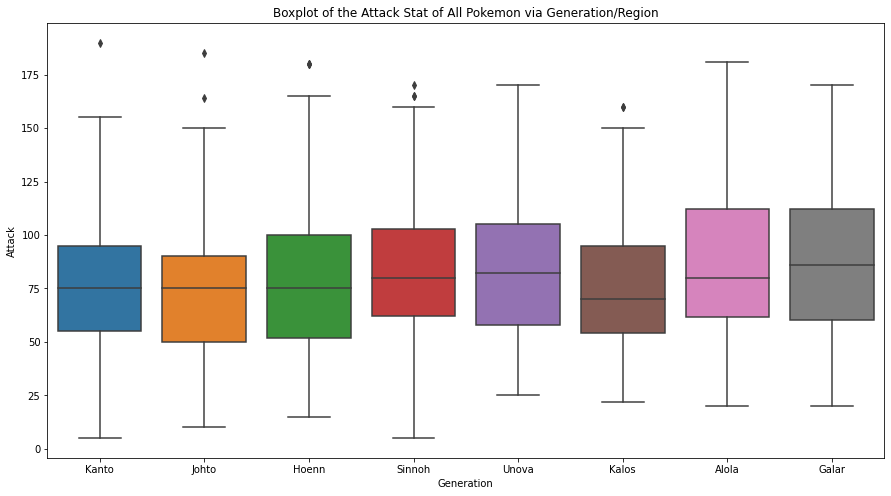

In [ ]:
# Creating a boxplot showing the attack stats based on region (ordered)

plt.figure(figsize=(15,8))
plt.title('Boxplot of the Attack Stat of All Pokemon via Generation/Region')
figure = sns.boxplot(x = "Generation", y = 'Attack', data = poke)
plt.xticks(range(len(region_labels)), region_labels)

The p-value for Attack is 0.0122 which tells us that it is there is a group that is statistically significant compared to the others. This is something that I cannot really see besides the outliers from the regions. The outliers are perhaps the ones that are mostly responsible for a relatively low p-value, but the variation of each region may have contribute a bit as well. It is still interesting how the Attack attribute is different in all regions for all pokemon. 

We can now try to do by type seperately. 
(I was unsucessful in creating a method in getting all f values and p values by type under one cell of code)

In [ ]:
#grouped_df = df.groupby("Type 1")
#stats_list = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Find the unique type 1 values
#types = df['Type 1'].unique()

# Loop through each type 1 group
#for type_1 in types:
    # Select only the rows that belong to the current type_1
#    type_1_group = grouped_df.get_group(type_1)

#    print(f"\n Results for {type_1}-type Pokemon\n")
#    for stat in stats_list:
        # Get all the stats for the current type_1, for each of the other type 1 values
#        groups = [grouped_df.get_group(t)[stat] for t in types if t != type_1]

        # Perform the ANOVA test
#        f_value, p_value = stats.f_oneway(type_1_group[stat], *groups)
#        print(f"ANOVA results for {stat}: F-value= {f_value:.2f}, p-value= {p_value:.4f}")
## Here is a the code that I tried to get to work for this. It was able to produce the F-values, but not the P-values.
## I tried most combinations, but not all. I will later see if I can get it to work. 

In [ ]:
# Grouping by type
fighting_grouped = fighting_pokemon.groupby('Generation')

# Loop through the list of stats
print("ANOVA Results for Fighting-type Pokemon\n")
for stat in stats_list:
    f_value, p_value = stats.f_oneway(*[group[stat] for _, group in fighting_grouped])
    print(f"ANOVA results for {stat}: F-value= {f_value:.2f}, p-value= {p_value:.4f}")

ANOVA Results for Fighting-type Pokemon

ANOVA results for Total: F-value= 0.49, p-value= 0.8424
ANOVA results for HP: F-value= 1.59, p-value= 0.1529
ANOVA results for Attack: F-value= 0.46, p-value= 0.8579
ANOVA results for Defense: F-value= 1.43, p-value= 0.2092
ANOVA results for Sp. Atk: F-value= 1.14, p-value= 0.3480
ANOVA results for Sp. Def: F-value= 0.65, p-value= 0.7154
ANOVA results for Speed: F-value= 0.56, p-value= 0.7864


We can see that the p-values for each stat is not statistically significant meaning we will reject all the data sampled from populations with the same mean. The one that was relatively close to P < 0.05 was Defense. I want to say that I am not suprised by it due to the idea that fighting types are commonly known as the type that has high attack/speed, but lacks defense. If the P-value was less than 0.05, then we can say that there is significant difference amongst generations when it comes to defense. 

I will us this similar line(s) of code for all types. I will show which types and stats contain statistical significance and see what else we can with that information. 

In short, if the P-value is <0.05, then there is reason to believe that the type we are testing has a stat that there is a statistically significant difference in the said type. And it is not because of chance. 

We can also add graphs in order to intrepret our findings and see which region(s) are different from one another. 

In [ ]:
dragon_grouped = dragon_pokemon.groupby('Generation')

# stats_list = ['Attack']

# Loop through the list of stats
print("Results for Dragon-type Pokemon\n")
for stat in stats_list:
    f_value, p_value = stats.f_oneway(*[group[stat] for _, group in dragon_grouped])
    print(f"ANOVA results for {stat}: F-value= {f_value:.2f}, p-value= {p_value:.4f}")

Results for Dragon-type Pokemon

ANOVA results for Total: F-value= 1.06, p-value= 0.4000
ANOVA results for HP: F-value= 0.88, p-value= 0.5303
ANOVA results for Attack: F-value= 2.28, p-value= 0.0391
ANOVA results for Defense: F-value= 0.76, p-value= 0.6223
ANOVA results for Sp. Atk: F-value= 0.96, p-value= 0.4685
ANOVA results for Sp. Def: F-value= 1.74, p-value= 0.1155
ANOVA results for Speed: F-value= 1.58, p-value= 0.1575


Now we have some stats that we can look into a bit more! What we can see if that there is a significance difference in Defense, and Special Defense amongst each generation. We can explore of this with other statistical analysis. 

([<matplotlib.axis.XTick at 0x7ff957bdd970>,
 [Text(0, 0, 'Kanto'),
  Text(1, 0, 'Johto'),
  Text(2, 0, 'Hoenn'),
  Text(3, 0, 'Sinnoh'),
  Text(4, 0, 'Unova'),
  Text(5, 0, 'Kalos'),
  Text(6, 0, 'Alola'),
  Text(7, 0, 'Galar')])

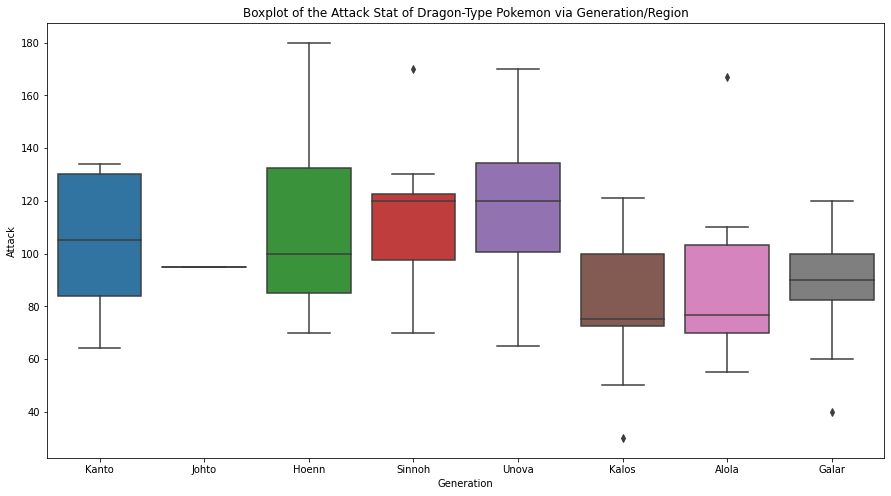

In [ ]:
# Creating a boxplot showing the attack stats based on region (ordered)

plt.figure(figsize=(15,8))
plt.title('Boxplot of the Attack Stat of Dragon-Type Pokemon via Generation/Region')
figure = sns.boxplot(x = "Generation", y = 'Attack', data = dragon_pokemon)
plt.xticks(range(len(region_labels)), region_labels)

We can see that Johto may not have a lot of Dragon type pokemon which is possibly one of contributions to a statistical siginificance. We also can see that Hoenn has a huge gap between attack. We can also see a similar effect in Unova. 

In [ ]:
# Showing which pokemon is the outlier for Hoenn, Sinnioh and Alola 

high_attack = dragon_pokemon[dragon_pokemon['Attack'] > 160]

highest_attack = high_attack.groupby("Generation").apply(lambda x: x.loc[x["Attack"].idxmax()])

print(highest_attack[['Name', "Attack", "Legendary"]])

                              Name  Attack  Legendary
Generation                                           
3            RayquazaMega Rayquaza     180          1
4            GarchompMega Garchomp     170          0
5               KyuremBlack Kyurem     170          1
7           NecrozmaUltra Necrozma     167          1


In [ ]:
dark_grouped = dark_pokemon.groupby('Generation')

# stats_list = ['HP']

# Loop through the list of stats
print("Results for Dark-type Pokemon\n")
for stat in stats_list:
    f_value, p_value = stats.f_oneway(*[group[stat] for _, group in dark_grouped])
    print(f"ANOVA results for {stat}: F-value= {f_value:.2f}, p-value= {p_value:f}")

Results for Dark-type Pokemon

ANOVA results for Total: F-value= 1.44, p-value= 0.204081
ANOVA results for HP: F-value= 4.83, p-value= 0.000192
ANOVA results for Attack: F-value= 0.80, p-value= 0.593682
ANOVA results for Defense: F-value= 0.59, p-value= 0.765438
ANOVA results for Sp. Atk: F-value= 1.41, p-value= 0.217917
ANOVA results for Sp. Def: F-value= 1.55, p-value= 0.166893
ANOVA results for Speed: F-value= 1.00, p-value= 0.438565


([<matplotlib.axis.XTick at 0x7fc7898782e0>,
 [Text(0, 0, 'Kanto'),
  Text(1, 0, 'Johto'),
  Text(2, 0, 'Hoenn'),
  Text(3, 0, 'Sinnoh'),
  Text(4, 0, 'Unova'),
  Text(5, 0, 'Kalos'),
  Text(6, 0, 'Alola'),
  Text(7, 0, 'Galar')])

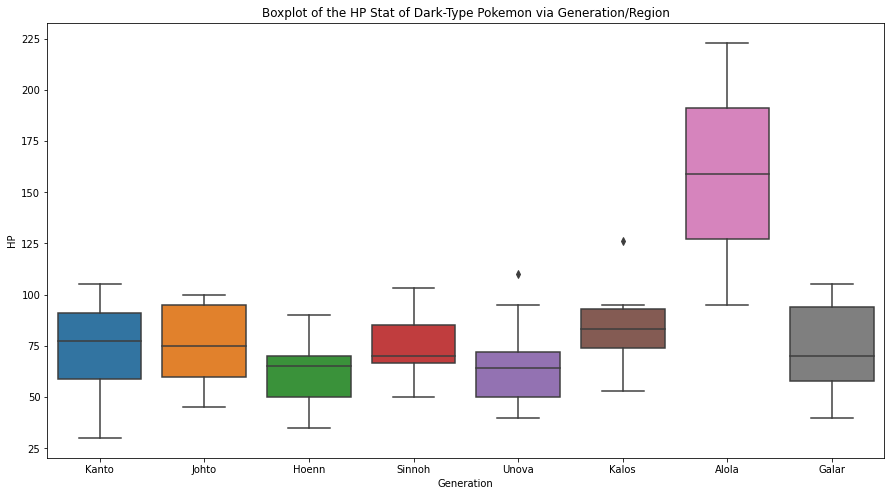

In [ ]:
## Plotting via boxplot 
# Creating a boxplot showing the HP stat based on region (ordered)

plt.figure(figsize=(15,8))
plt.title('Boxplot of the HP Stat of Dark-Type Pokemon via Generation/Region')
figure = sns.boxplot(x = "Generation", y = 'HP', data = dark_pokemon)
plt.xticks(range(len(region_labels)), region_labels)

We can see that Alola is the main reason why there is a huge statistical significance amongst dark type pokemon in relation to HP. It is very interesting how Dark type pokemon, on average, have low HP stat. And then there is Alola with a huge boxplot and being often having higher HP and the best dark type pokemon from other regions. 

In [ ]:
water_grouped = water_pokemon.groupby('Generation')

# stats_list ['Speed']

# Loop through the list of stats
print("Results for Water-type Pokemon\n")
for stat in stats_list:
    f_value, p_value = stats.f_oneway(*[group[stat] for _, group in water_grouped])
    print(f"ANOVA results for {stat}: F-value= {f_value:.2f}, p-value= {p_value:.4f}")

Results for Water-type Pokemon

ANOVA results for Total: F-value= 0.28, p-value= 0.9605
ANOVA results for HP: F-value= 1.60, p-value= 0.1410
ANOVA results for Attack: F-value= 0.80, p-value= 0.5880
ANOVA results for Defense: F-value= 1.44, p-value= 0.1931
ANOVA results for Sp. Atk: F-value= 0.99, p-value= 0.4407
ANOVA results for Sp. Def: F-value= 1.31, p-value= 0.2511
ANOVA results for Speed: F-value= 2.65, p-value= 0.0133


([<matplotlib.axis.XTick at 0x7ff957a87c70>,
 [Text(0, 0, 'Kanto'),
  Text(1, 0, 'Johto'),
  Text(2, 0, 'Hoenn'),
  Text(3, 0, 'Sinnoh'),
  Text(4, 0, 'Unova'),
  Text(5, 0, 'Kalos'),
  Text(6, 0, 'Alola'),
  Text(7, 0, 'Galar')])

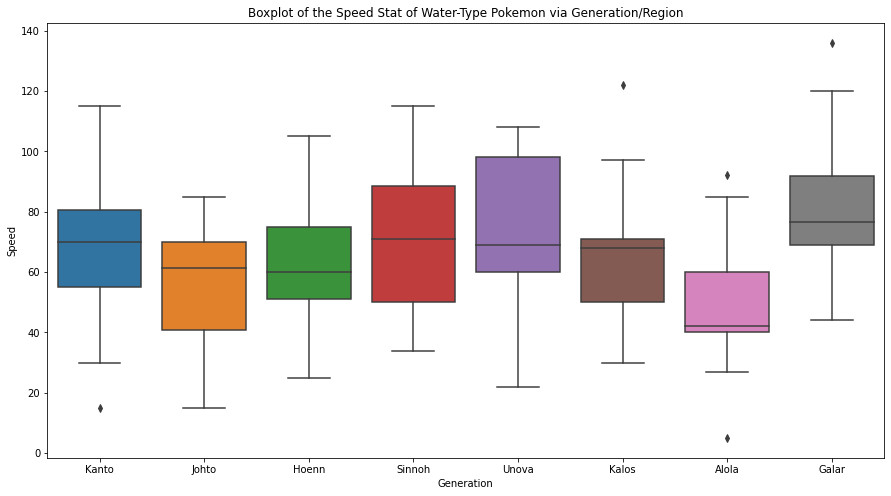

In [ ]:
# Creating a boxplot showing the Speed stats based on region (ordered)

plt.figure(figsize=(15,8))
plt.title('Boxplot of the Speed Stat of Water-Type Pokemon via Generation/Region')
figure = sns.boxplot(x = "Generation", y = 'Speed', data = water_pokemon)
plt.xticks(range(len(region_labels)), region_labels)

This seems to be in normal distributed boxplots. I suppose the reason of the statistical significance was because of how each box has a relative high standard deviation amongst its generation/regio especially in Kanto. 

In [ ]:
grass_grouped = grass_pokemon.groupby('Generation')

# stats_list = ['Sp. Atk']

# Loop through the list of stats
print("Results for Grass-type Pokemon\n")
for stat in stats_list:
    f_value, p_value = stats.f_oneway(*[group[stat] for _, group in grass_grouped])
    print(f"ANOVA results for {stat}: F-value= {f_value:.2f}, p-value= {p_value:.4f}")

Results for Grass-type Pokemon

ANOVA results for Total: F-value= 0.53, p-value= 0.8130
ANOVA results for HP: F-value= 0.66, p-value= 0.7087
ANOVA results for Attack: F-value= 1.17, p-value= 0.3248
ANOVA results for Defense: F-value= 2.02, p-value= 0.0589
ANOVA results for Sp. Atk: F-value= 2.98, p-value= 0.0066
ANOVA results for Sp. Def: F-value= 0.68, p-value= 0.6855
ANOVA results for Speed: F-value= 0.38, p-value= 0.9144


([<matplotlib.axis.XTick at 0x7ff9541d8550>,
 [Text(0, 0, 'Kanto'),
  Text(1, 0, 'Johto'),
  Text(2, 0, 'Hoenn'),
  Text(3, 0, 'Sinnoh'),
  Text(4, 0, 'Unova'),
  Text(5, 0, 'Kalos'),
  Text(6, 0, 'Alola'),
  Text(7, 0, 'Galar')])

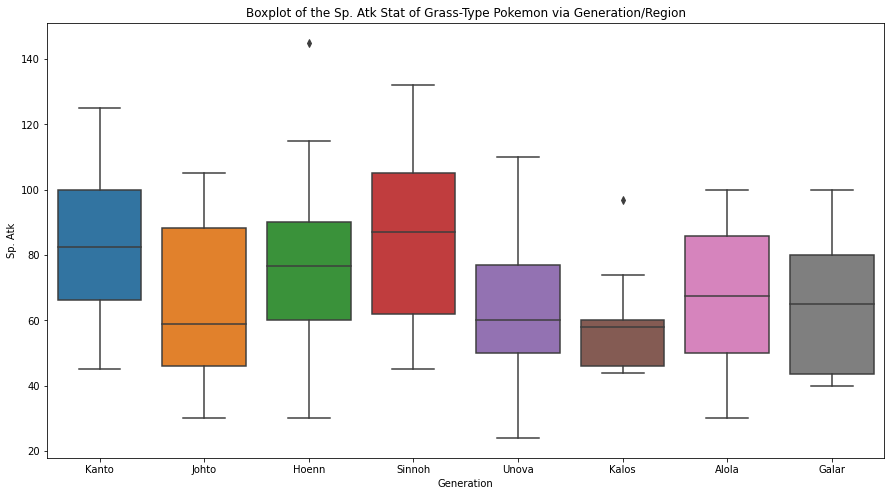

In [ ]:
# Creating a boxplot showing the Sp. Attack stats based on region (ordered)

plt.figure(figsize=(15,8))
plt.title('Boxplot of the Sp. Atk Stat of Grass-Type Pokemon via Generation/Region')
figure = sns.boxplot(x = "Generation", y = 'Sp. Atk', data = grass_pokemon)
plt.xticks(range(len(region_labels)), region_labels)

One can see that Kalos was the one that was contributing towards a statistical significance. It is interesting to see that Kalos did not have a lot of unique values of special attacks. While Sinnoh has an enourmous variations of special attacks in its regions. 

In [ ]:
normal_grouped = normal_pokemon.groupby('Generation')

# stats_list = ['Attack']

# Loop through the list of stats
print("Results for Normal-type Pokemon\n")
for stat in stats_list:
    f_value, p_value = stats.f_oneway(*[group[stat] for _, group in normal_grouped])
    print(f"ANOVA results for {stat}: F-value= {f_value:.2f}, p-value= {p_value:.4f}")

Results for Grass-type Pokemon

ANOVA results for Total: F-value= 1.02, p-value= 0.4200
ANOVA results for HP: F-value= 0.74, p-value= 0.6407
ANOVA results for Attack: F-value= 2.21, p-value= 0.0383
ANOVA results for Defense: F-value= 1.62, p-value= 0.1359
ANOVA results for Sp. Atk: F-value= 0.82, p-value= 0.5685
ANOVA results for Sp. Def: F-value= 0.93, p-value= 0.4862
ANOVA results for Speed: F-value= 1.35, p-value= 0.2347


([<matplotlib.axis.XTick at 0x7ff9540e4b50>,
 [Text(0, 0, 'Kanto'),
  Text(1, 0, 'Johto'),
  Text(2, 0, 'Hoenn'),
  Text(3, 0, 'Sinnoh'),
  Text(4, 0, 'Unova'),
  Text(5, 0, 'Kalos'),
  Text(6, 0, 'Alola'),
  Text(7, 0, 'Galar')])

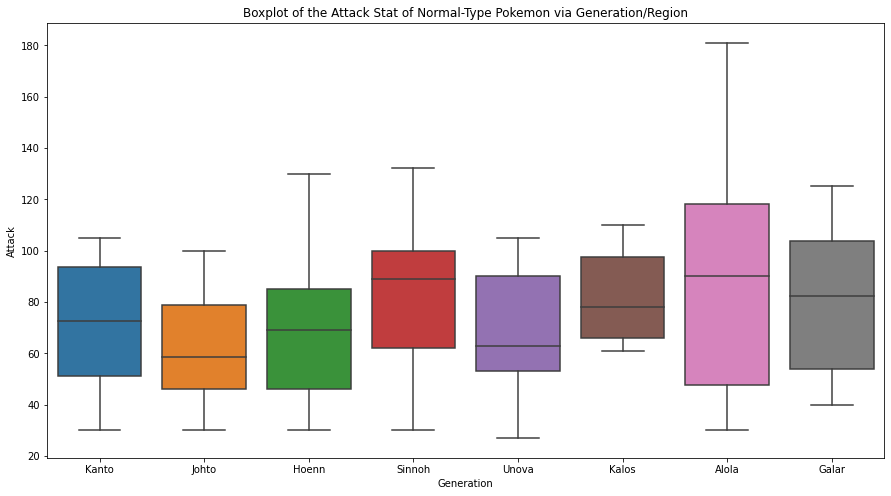

In [ ]:
# Creating a boxplot showing the Attack stats based on region (ordered)

plt.figure(figsize=(15,8))
plt.title('Boxplot of the Attack Stat of Normal-Type Pokemon via Generation/Region')
figure = sns.boxplot(x = "Generation", y = 'Attack', data = grass_pokemon)
plt.xticks(range(len(region_labels)), region_labels)

Alola is definetly the one that contains the most amount of variation amongst all regions/generations. I am very suprised how it did contribute to a statistical significance since many of the other boxplot were relatively the same. Hoenn and Sinnoh were the other two that may have contributed towards having a p-value close (less than) to 0.05.

In [ ]:
flying_grouped = flying_pokemon.groupby('Generation')

# stats_list = ['Attack']

# Loop through the list of stats
print("Results for Flying-type Pokemon\n")
for stat in stats_list:
    f_value, p_value = stats.f_oneway(*[group[stat] for _, group in flying_grouped])
    print(f"ANOVA results for {stat}: F-value= {f_value:.2f}, p-value= {p_value:.4f}")

Results for Grass-type Pokemon

ANOVA results for Total: F-value= 0.66, p-value= 0.7079
ANOVA results for HP: F-value= 0.46, p-value= 0.8649
ANOVA results for Attack: F-value= 2.31, p-value= 0.0305
ANOVA results for Defense: F-value= 0.25, p-value= 0.9702
ANOVA results for Sp. Atk: F-value= 0.57, p-value= 0.7820
ANOVA results for Sp. Def: F-value= 1.25, p-value= 0.2835
ANOVA results for Speed: F-value= 1.31, p-value= 0.2513


([<matplotlib.axis.XTick at 0x7ff953adedc0>,
 [Text(0, 0, 'Kanto'),
  Text(1, 0, 'Johto'),
  Text(2, 0, 'Hoenn'),
  Text(3, 0, 'Sinnoh'),
  Text(4, 0, 'Unova'),
  Text(5, 0, 'Kalos'),
  Text(6, 0, 'Alola'),
  Text(7, 0, 'Galar')])

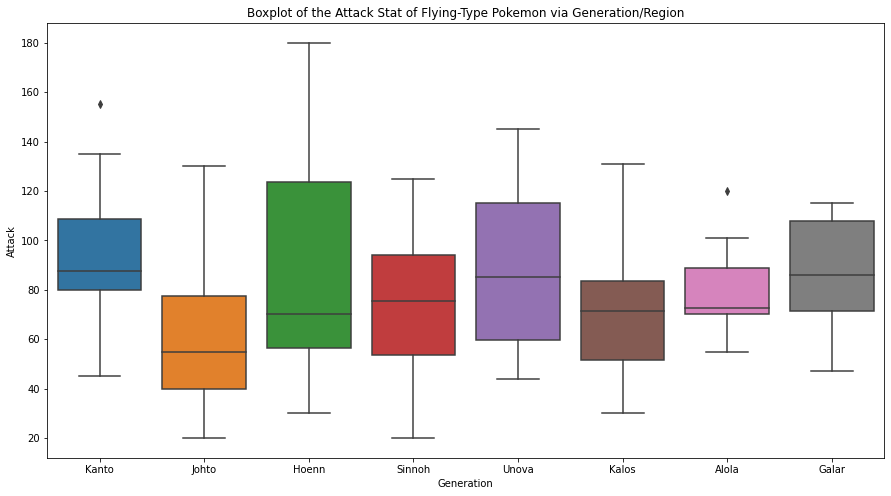

In [ ]:
# Creating a boxplot showing the Attack stats based on region (ordered)

plt.figure(figsize=(15,8))
plt.title('Boxplot of the Attack Stat of Flying-Type Pokemon via Generation/Region')
figure = sns.boxplot(x = "Generation", y = 'Attack', data = flying_pokemon)
plt.xticks(range(len(region_labels)), region_labels)

I find the Kanto boxplot to be interesting since I would assume many flying type pokemon would range a lot for its first region. But Hoenn takes it into another level as it often the region that is known to have a lot of water, as well as an environment that has lots of flying-type pokemon. When there is a lot of population of flying type pokemon, there will always be a huge boxplot to show. 

In [ ]:
fairy_grouped = fairy_pokemon.groupby('Generation')

# stats_list = [ 'Sp. Atk']

# Loop through the list of stats
print("Results for Fairy-type Pokemon\n")
for stat in stats_list:
    f_value, p_value = stats.f_oneway(*[group[stat] for _, group in fairy_grouped])
    print(f"ANOVA results for {stat}: F-value= {f_value:.2f}, p-value= {p_value:.4f}")

Results for Fairy-type Pokemon

ANOVA results for Total: F-value= 1.95, p-value= 0.0783
ANOVA results for HP: F-value= 1.26, p-value= 0.2850
ANOVA results for Attack: F-value= 1.76, p-value= 0.1132
ANOVA results for Defense: F-value= 0.94, p-value= 0.4829
ANOVA results for Sp. Atk: F-value= 2.19, p-value= 0.0489
ANOVA results for Sp. Def: F-value= 1.79, p-value= 0.1071
ANOVA results for Speed: F-value= 1.99, p-value= 0.0718


([<matplotlib.axis.XTick at 0x7fc7895e1c70>,
 [Text(0, 0, 'Kanto'),
  Text(1, 0, 'Johto'),
  Text(2, 0, 'Hoenn'),
  Text(3, 0, 'Sinnoh'),
  Text(4, 0, 'Unova'),
  Text(5, 0, 'Kalos'),
  Text(6, 0, 'Alola'),
  Text(7, 0, 'Galar')])

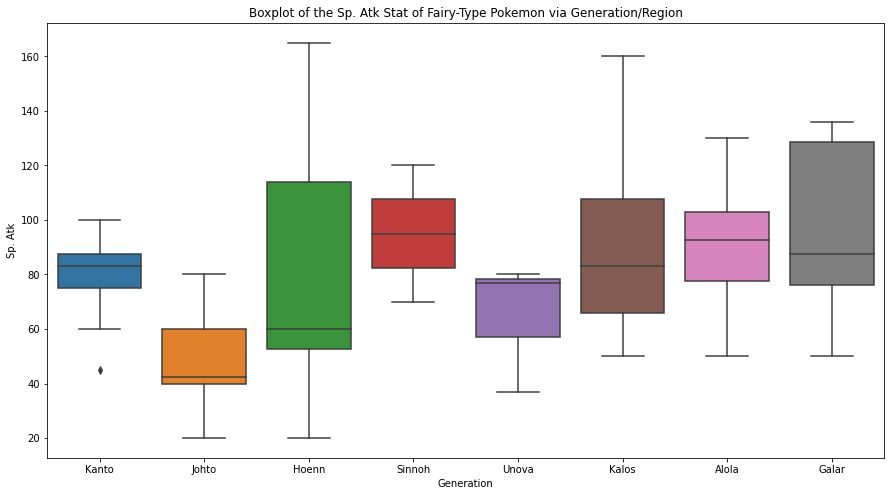

In [ ]:
# Creating a boxplot showing the Special Attack stats based on region (ordered)

plt.figure(figsize=(15,8))
plt.title('Boxplot of the Sp. Atk Stat of Fairy-Type Pokemon via Generation/Region')
figure = sns.boxplot(x = "Generation", y = 'Sp. Atk', data = fairy_pokemon)
plt.xticks(range(len(region_labels)), region_labels)

What I expected in this graph to have a lot of Fairy types (or the variation) to be most frequent towards Kalos since that is where Fairy type pokemon were introduced in. Hoenn was the region that suprised me the most as GameFreak/Nintendo must've changed a lot of pokemon typings after the introduction to Fairy type pokemon. 

In [ ]:
ground_grouped = ground_pokemon.groupby('Generation')

# stats_list = ['HP']

# Loop through the list of stats
print("Results for Ground-type Pokemon\n")
for stat in stats_list:
    f_value, p_value = stats.f_oneway(*[group[stat] for _, group in ground_grouped])
    print(f"ANOVA results for {stat}: F-value= {f_value:.2f}, p-value= {p_value:.4f}")

Results for Ground-type Pokemon

ANOVA results for Total: F-value= 1.03, p-value= 0.4201
ANOVA results for HP: F-value= 2.52, p-value= 0.0227
ANOVA results for Attack: F-value= 0.79, p-value= 0.5988
ANOVA results for Defense: F-value= 1.05, p-value= 0.4023
ANOVA results for Sp. Atk: F-value= 2.64, p-value= 0.0173
ANOVA results for Sp. Def: F-value= 1.90, p-value= 0.0827
ANOVA results for Speed: F-value= 1.84, p-value= 0.0923


([<matplotlib.axis.XTick at 0x7fc7896a6070>,
 [Text(0, 0, 'Kanto'),
  Text(1, 0, 'Johto'),
  Text(2, 0, 'Hoenn'),
  Text(3, 0, 'Sinnoh'),
  Text(4, 0, 'Unova'),
  Text(5, 0, 'Kalos'),
  Text(6, 0, 'Alola'),
  Text(7, 0, 'Galar')])

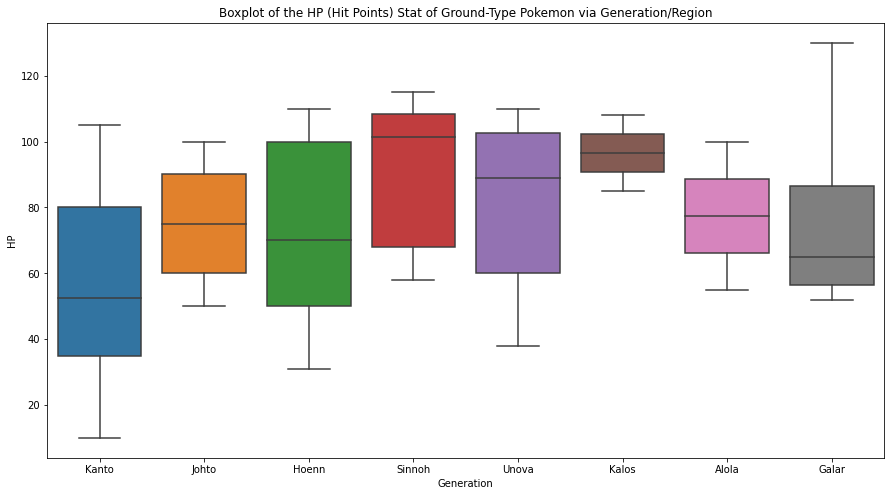

In [ ]:
# Creating a boxplot showing the HP (Hit Points) stats based on region (ordered)

plt.figure(figsize=(15,8))
plt.title('Boxplot of the HP (Hit Points) Stat of Ground-Type Pokemon via Generation/Region')
figure = sns.boxplot(x = "Generation", y = 'HP', data = ground_pokemon)
plt.xticks(range(len(region_labels)), region_labels)

The Kalos region is the region that perhaps caused the most statistical signifiance. This is perhaps because there is a small population size of Rock type pokemon in Kalos due to the boxplot being super small. When it comes to Kanto, it becomes the complete opposite as they have a lot of variation of HP for rock type pokemon. This is probably because of its huge population of Rock or containing a fair amount of Rock type that have vastly different stat pools. The Galar region maybe similar to Kanto, but due to its huge standard deviation there may have a smaller population size compared to Kanto. 

In [ ]:
electric_grouped = electric_pokemon.groupby('Generation')

stats_list = ['Attack', 'Defense']

# Loop through the list of stats
print("Results for Electric-type Pokemon\n")
for stat in stats_list:
    f_value, p_value = stats.f_oneway(*[group[stat] for _, group in electric_grouped])
    print(f"ANOVA results for {stat}: F-value= {f_value:.2f}, p-value= {p_value:.4f}")

Results for Grass-type Pokemon

ANOVA results for Total: F-value= 0.75, p-value= 0.6277
ANOVA results for HP: F-value= 1.66, p-value= 0.1343
ANOVA results for Attack: F-value= 2.76, p-value= 0.0141
ANOVA results for Defense: F-value= 2.20, p-value= 0.0457
ANOVA results for Sp. Atk: F-value= 0.43, p-value= 0.8808
ANOVA results for Sp. Def: F-value= 1.47, p-value= 0.1925
ANOVA results for Speed: F-value= 0.73, p-value= 0.6442


Text(0, 0.5, 'Value')

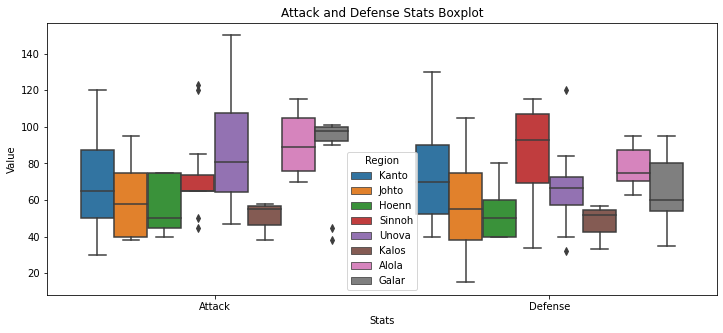

In [ ]:
gen_to_region = {1: "Kanto", 2:"Johto", 3:"Hoenn",
                 4:"Sinnoh", 5:"Unova", 6:"Kalos",
                 7:"Alola", 8:"Galar"}

electric_pokemon['Region'] = electric_pokemon['Generation'].map(gen_to_region)

Boxplot_electric = pd.melt(electric_pokemon, id_vars = [
    "#", 
    "Name", 
    "Type 1", 
    "Generation",
    "Region"
    ], value_vars = [
    "Attack", 
    "Defense" # Keeping these into columns 
])
plt.figure(figsize=(12,5))
fig = sns.boxplot(x="variable", y="value", hue = "Region", data=Boxplot_electric)
plt.title("Attack and Defense Stats Boxplot")
plt.xlabel("Stats")
plt.ylabel("Value")

We can see there is a evidence that there are few Electric type pokemon in the Sinnoh and Galar region due to their significanlty smaller boxplot compared to others. What I found interesting is how Sinnoh has 4 outliers that are relatively close to one another. I would imagine that these 4 outliers are relatived to another another, perhaps evolutions. We can actually see that via where statements

This is probably one of the most interesting ANOVA boxplots we have seen. This is because we cannot see a common consensus with the data. The only thing that I can come up with is how high each standard deviation of each generation is compared to one another. It maybe possible that GameFreak/Nintendo may not know what to do with Electric type pokemon when it comes to the defense stat. Or this can also provide evidence that electric type pokemon are known to be glass canon due to their spontaneous defense distribution amongst the generation. 

In [ ]:
ice_grouped = ice_pokemon.groupby('Generation')

# stats_list = ['Defense', 'Speed']

# Loop through the list of stats
print("Results for Ice-type Pokemon\n")
for stat in stats_list:
    f_value, p_value = stats.f_oneway(*[group[stat] for _, group in ice_grouped])
    print(f"ANOVA results for {stat}: F-value= {f_value:.2f}, p-value= {p_value:.4f}")

Results for Ice-type Pokemon

ANOVA results for Total: F-value= 0.95, p-value= 0.4796
ANOVA results for HP: F-value= 0.93, p-value= 0.4945
ANOVA results for Attack: F-value= 1.63, p-value= 0.1506
ANOVA results for Defense: F-value= 2.02, p-value= 0.0712
ANOVA results for Sp. Atk: F-value= 0.94, p-value= 0.4857
ANOVA results for Sp. Def: F-value= 1.25, p-value= 0.2927
ANOVA results for Speed: F-value= 2.29, p-value= 0.0427


Text(0, 0.5, 'Value')

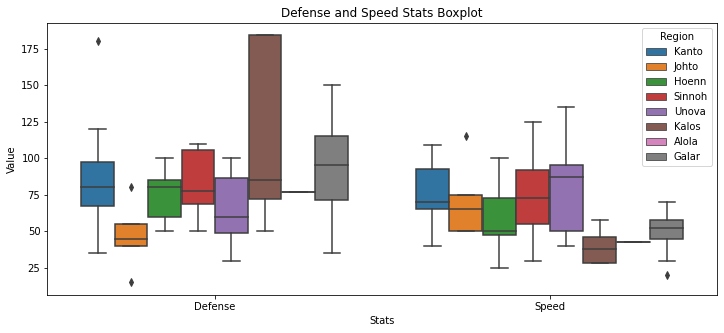

In [ ]:
ice_pokemon['Region'] = ice_pokemon['Generation'].map(gen_to_region)

Boxplot_ice = pd.melt(ice_pokemon, id_vars = [
    "#", 
    "Name", 
    "Type 1", 
    "Generation",
    "Region"
    ], value_vars = [
    "Defense", 
    "Speed" # Keeping these into columns 
])
plt.figure(figsize=(12,5))
fig = sns.boxplot(x="variable", y="value", hue = "Region", data=Boxplot_ice)
plt.title("Defense and Speed Stats Boxplot")
plt.xlabel("Stats")
plt.ylabel("Value")

When it comes to these two plots, it can provide us the idea that each region may have type "specialize" in one area since Unova and Kalos are vastly different when it comes to speed, and defense stats. It cannot be understated that the Speed stat in Ice type pokemon in the Kalos region is suprisingly small compared to all of the others. Another interesting thing to note is how Alola has only less than two ice type pokemon due to how it is just a straight horizontal line. 

In [ ]:
ghost_grouped = ghost_pokemon.groupby('Generation')

# stats_list = ['Total', 'HP', 'Attack', 'Sp. Atk', 'Speed']

# Loop through the list of stats
print("Results for Ghost-type Pokemon\n")
for stat in stats_list:
    f_value, p_value = stats.f_oneway(*[group[stat] for _, group in ghost_grouped])
    print(f"ANOVA results for {stat}: F-value= {f_value:.2f}, p-value= {p_value:f}")

Results for Ghost-type Pokemon

ANOVA results for Total: F-value= 2.44, p-value= 0.027860
ANOVA results for HP: F-value= 3.20, p-value= 0.005736
ANOVA results for Attack: F-value= 2.72, p-value= 0.015586
ANOVA results for Defense: F-value= 1.01, p-value= 0.432941
ANOVA results for Sp. Atk: F-value= 2.52, p-value= 0.023765
ANOVA results for Sp. Def: F-value= 0.84, p-value= 0.561499
ANOVA results for Speed: F-value= 3.01, p-value= 0.008510


Text(0, 0.5, 'Value')

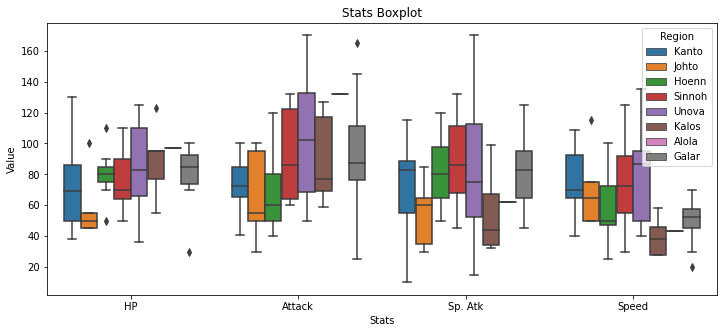

In [ ]:
ghost_pokemon['Region'] = ghost_pokemon['Generation'].map(gen_to_region)

Boxplot_ghost = pd.melt(ice_pokemon, id_vars = [
    "#", 
    "Name", 
    "Type 1", 
    "Generation",
    "Region"
    ], value_vars = [
    "HP",
    "Attack",
    "Sp. Atk",
    "Speed"
])
plt.figure(figsize=(12,5))
fig = sns.boxplot(x="variable", y="value", hue = "Region", data=Boxplot_ghost)
plt.title("Stats Boxplot for Ghost-type Pokemon")
plt.xlabel("Stats")
plt.ylabel("Value")

We will be moving total into its own boxplot since it has much bigger values and the rest

([<matplotlib.axis.XTick at 0x7fc788a132b0>,
 [Text(0, 0, 'Kanto'),
  Text(1, 0, 'Johto'),
  Text(2, 0, 'Hoenn'),
  Text(3, 0, 'Sinnoh'),
  Text(4, 0, 'Unova'),
  Text(5, 0, 'Kalos'),
  Text(6, 0, 'Alola'),
  Text(7, 0, 'Galar')])

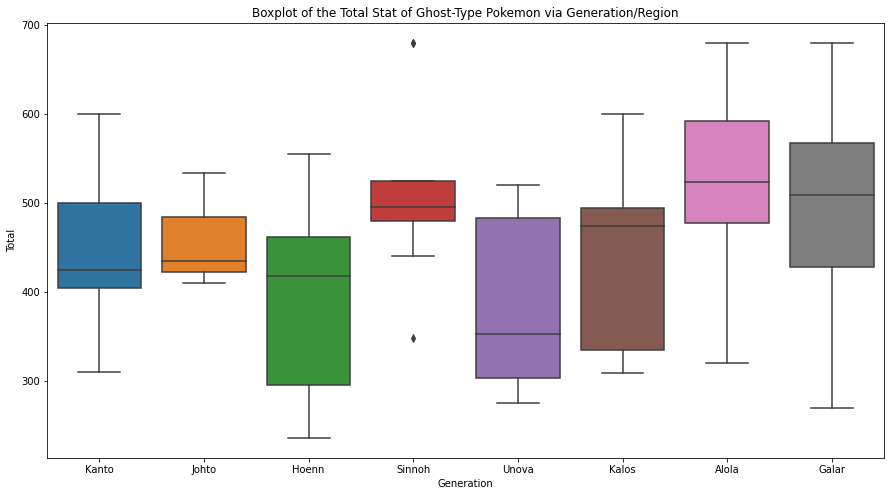

In [ ]:
# Creating a boxplot showing the Total stats based on region (ordered)

plt.figure(figsize=(15,8))
plt.title('Boxplot of the Total Stat of Ghost-Type Pokemon via Generation/Region')
figure = sns.boxplot(x = "Generation", y = 'Total', data = ghost_pokemon)
plt.xticks(range(len(region_labels)), region_labels)

The ghost type pokemon are the strangest typing in pokemon due to how many statistical significance it has in the regions. This is perhaps how ambiguous the typing in varies from region to region. In the end, we may not know what the type specializes in as well as predicting its next stats for the new region. But it is amazing how different each region is when it comes to comparing attacks such as of Kanto to Unova.  

In [ ]:
steel_grouped = steel_pokemon.groupby('Generation')

# stats_list = ['Total', 'HP', 'Attack', 'Defense']

# Loop through the list of stats
print("Results for Steel-type Pokemon\n")
for stat in stats_list:
    f_value, p_value = stats.f_oneway(*[group[stat] for _, group in steel_grouped])
    print(f"ANOVA results for {stat}: F-value= {f_value:.2f}, p-value= {p_value:.4f}")

Results for Steel-type Pokemon

ANOVA results for Total: F-value= 2.37, p-value= 0.0323
ANOVA results for HP: F-value= 3.76, p-value= 0.0018
ANOVA results for Attack: F-value= 2.76, p-value= 0.0141
ANOVA results for Defense: F-value= 3.64, p-value= 0.0022
ANOVA results for Sp. Atk: F-value= 1.81, p-value= 0.1002
ANOVA results for Sp. Def: F-value= 1.80, p-value= 0.1030
ANOVA results for Speed: F-value= 0.61, p-value= 0.7429


Text(0, 0.5, 'Value')

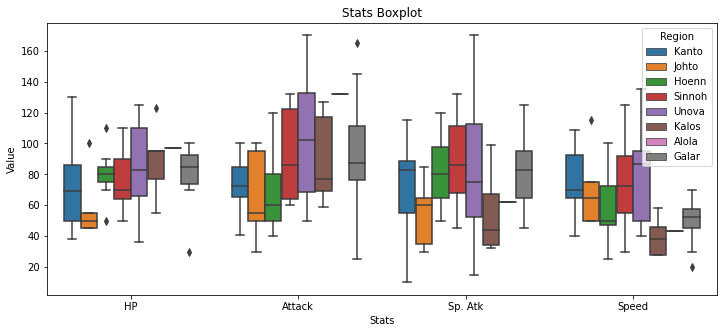

In [ ]:
steel_pokemon['Region'] = steel_pokemon['Generation'].map(gen_to_region)

Boxplot_steel = pd.melt(ice_pokemon, id_vars = [
    "#", 
    "Name", 
    "Type 1", 
    "Generation",
    "Region"
    ], value_vars = [
    "HP",
    "Attack",
    "Defense"
])
plt.figure(figsize=(12,5))
fig = sns.boxplot(x="variable", y="value", hue = "Region", data=Boxplot_ghost)
plt.title("Stats Boxplot for Steel-type Pokemon")
plt.xlabel("Stats")
plt.ylabel("Value")

([<matplotlib.axis.XTick at 0x7fc788918b20>,
 [Text(0, 0, 'Kanto'),
  Text(1, 0, 'Johto'),
  Text(2, 0, 'Hoenn'),
  Text(3, 0, 'Sinnoh'),
  Text(4, 0, 'Unova'),
  Text(5, 0, 'Kalos'),
  Text(6, 0, 'Alola'),
  Text(7, 0, 'Galar')])

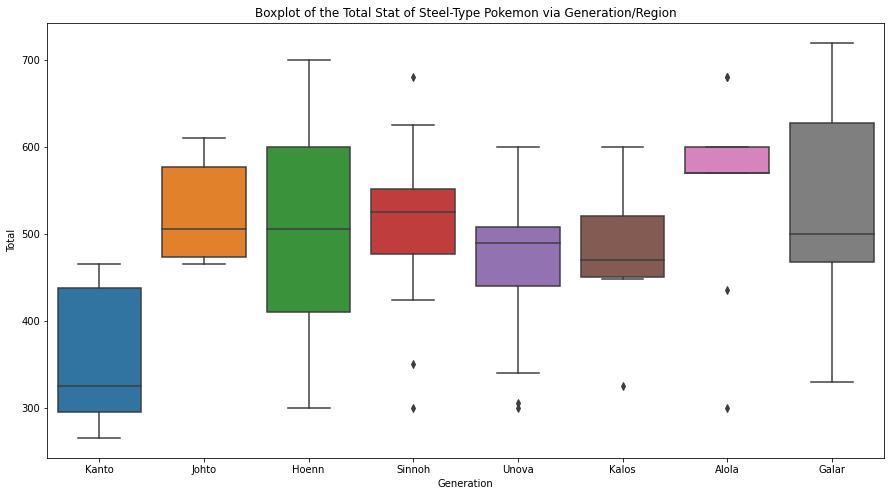

In [ ]:
# Creating a boxplot showing the Total stats based on region (ordered)

plt.figure(figsize=(15,8))
plt.title('Boxplot of the Total Stat of Steel-Type Pokemon via Generation/Region')
figure = sns.boxplot(x = "Generation", y = 'Total', data = steel_pokemon)
plt.xticks(range(len(region_labels)), region_labels)

I am just amazed how Johto, in general, has higher total stats than the ones from Kanto. It is honestly impressive how it was such a possibility for that to happen. What I am also amazed is how many outliers there are in the total stat department in some regions. Alola is in a strange stop since it has a small boxplot, as well as, having no mean/median. Meaning there are a select few steel type pokemon there. 

In [ ]:
rock_grouped = rock_pokemon.groupby('Generation')

# stats_list = ['Sp. Def',]

# Loop through the list of stats
print("Results for Rock-type Pokemon\n")
for stat in stats_list:
    f_value, p_value = stats.f_oneway(*[group[stat] for _, group in rock_grouped])
    print(f"ANOVA results for {stat}: F-value= {f_value:.2f}, p-value= {p_value:.4f}")

Results for Rock-type Pokemon

ANOVA results for Total: F-value= 0.49, p-value= 0.8386
ANOVA results for HP: F-value= 0.38, p-value= 0.9093
ANOVA results for Attack: F-value= 0.39, p-value= 0.9023
ANOVA results for Defense: F-value= 0.62, p-value= 0.7339
ANOVA results for Sp. Atk: F-value= 0.81, p-value= 0.5784
ANOVA results for Sp. Def: F-value= 2.30, p-value= 0.0362
ANOVA results for Speed: F-value= 1.91, p-value= 0.0807


([<matplotlib.axis.XTick at 0x7fc78823ac40>,
 [Text(0, 0, 'Kanto'),
  Text(1, 0, 'Johto'),
  Text(2, 0, 'Hoenn'),
  Text(3, 0, 'Sinnoh'),
  Text(4, 0, 'Unova'),
  Text(5, 0, 'Kalos'),
  Text(6, 0, 'Alola'),
  Text(7, 0, 'Galar')])

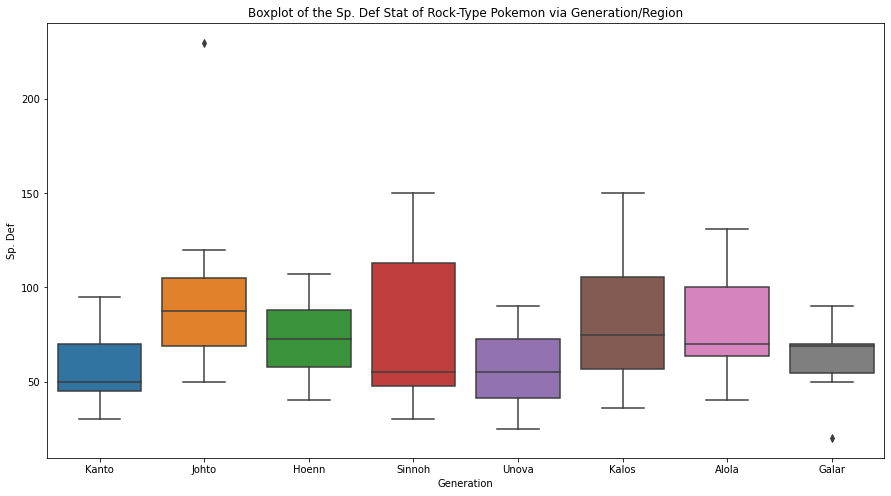

In [ ]:
# Creating a boxplot showing the Special Defense stats based on region (ordered)

plt.figure(figsize=(15,8))
plt.title('Boxplot of the Sp. Def Stat of Rock-Type Pokemon via Generation/Region')
figure = sns.boxplot(x = "Generation", y = 'Sp. Def', data = rock_pokemon)
plt.xticks(range(len(region_labels)), region_labels)

This one does seem common as Rock types are normally viewed as pokemon that are naturally good against (physical) attacks, and not special attacks. However, it is rather interesting how there is a common trend amongst rock type special defense, but there there is variation within this stat and the type. We can see that there is one huge outlier and we can possibly see which one it would be. My best guess will be steelix

In [ ]:
# Showing which pokemon is the outlier for Johto

high_sp_def = rock_pokemon[rock_pokemon['Sp. Def'] > 160]

highest_sp_def = high_sp_def.groupby("Generation").apply(lambda x: x.loc[x["Sp. Def"].idxmax()])

print(highest_sp_def[['Name', "Sp. Def", "Legendary"]])

266            Name  Sp. Def  Legendary
Generation                             
2           Shuckle      230          0


My prediction was wrong. 

While all F-values of ANOVA were very small, we cannot change the values at all in this given circumstance. Since we wanted to see if there are any statistical difference/significance amongst each type within a given region. Based on our findings, we can see that there are some regions that do fall out of the norm within the given stats. But, for the most part, we can see that many types and their stats are somewhat similar. What we cannot conclude in this search that each type specialize in a certain stat as time goes on.

In [ ]:
# Total
## ANOVA results for Total: F-value= 2.37, p-value= 0.0323

# HP 
## Dark-type Pokemon
## ANOVA results for HP: F-value= 4.83, p-value= 0.000192
## Ground-type 
## ANOVA results for HP: F-value= 2.52, p-value= 0.0227
## Ghost-type 
## ANOVA results for HP: F-value= 3.20, p-value= 0.005736
## Steel-type
## ANOVA results for HP: F-value= 3.76, p-value= 0.0018

# Attack
## Dragon-type Pokemon
## ANOVA results for Attack: F-value= 2.28, p-value= 0.0391
## Normal-Type
## ANOVA results for Attack: F-value= 2.21, p-value= 0.0383
## Flying-Type
## ANOVA results for Attack: F-value= 2.31, p-value= 0.0305
## Electric-type
## ANOVA results for Attack: F-value= 2.76, p-value= 0.0141
## Ghost-type
## ANOVA results for Attack: F-value= 2.72, p-value= 0.015586
## Steel-type
## ANOVA results for Attack: F-value= 2.76, p-value= 0.0141

# Defense
## Electric-type 
## ANOVA results for Defense: F-value= 2.20, p-value= 0.0457
## Steel
## ANOVA results for Defense: F-value= 3.64, p-value= 0.0022

# Sp. Attack
## Grass-type Pokemon
## ANOVA results for Sp. Atk: F-value= 2.98, p-value= 0.0066
## Fairy-type
## ANOVA results for Sp. Atk: F-value= 2.19, p-value= 0.0489

# Sp. Defense
## Rock-type
## ANOVA results for Sp. Def: F-value= 2.30, p-value= 0.0362

#Speed 
## Water-type Pokemon
## ANOVA results for Speed: F-value= 2.65, p-value= 0.0133
## Ice-type
## ANOVA results for Speed: F-value= 2.29, p-value= 0.0427
## Ghost
## ANOVA results for Speed: F-value= 3.01, p-value= 0.008510


# Linear Regression

In this we would like to test out if any variables can predict another. We can see that according to the heatmap, there are some correlation within each type (Noteably Total-Attack, and Total-Special Attack). This may present some multiconlinearity amongst a regression line, so that is something to look out for. We would like to see if we can create a (multiple) linear regression to see if we can predict one stat given the other stats of the pokemon. I would like to see if we can predict a Pokemon's HP based on all of its stats. I also would like to see speed as well. We will be removing Total for this ocassion due to it naturally contributing a lot from regression. 

In [ ]:
poke.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Ultra Beast
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0,0.0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0,0.0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0,0.0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0,0.0
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,0,0.0


In [ ]:
## Creating X, Y vallues for OLS (Ordinary Least Squares)
## Removing Generation, Legendary and others in order to prevent any unnecessary variables 

X = poke[['HP', 'Attack','Defense','Sp. Atk', 'Sp. Def', 'Legendary']]

y = poke[['Speed']]

In [ ]:
X_train_speed, X_test_speed, y_train_speed, y_test_speed = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [ ]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit(cov_type = 'HC3') ## Fit linear regression with robust standard errors
results = model

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Speed   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     73.35
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           1.82e-76
Time:                        02:05:40   Log-Likelihood:                -4894.6
No. Observations:                1058   AIC:                             9803.
Df Residuals:                    1051   BIC:                             9838.
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.8857      2.790     15.013      0.0

We can see that our (Adjusted) R^2 are both around 0.30, which gives us the idea that the model that we have received is not a great model to implement more studies. We can also see that we have a relative high AIC and BIC score. This allows us to know that our model may be overfitting the data. In order to combat this, we may need to remove some variables to have a simplier regression model. 

Creating a new "Simpler" model

In [ ]:
## Creating X, Y vallues for OLS (Ordinary Least Squares)
## Removing Generation, Legendary and others in order to prevent bias

X = poke[['Attack', 'Sp. Atk', 'Sp. Def', 'Legendary']]

y_speed = poke[['Speed']]

In [ ]:
X_train_speed, X_test_speed, y_train_speed, y_test_speed = train_test_split(X, y_speed, test_size= 0.3, random_state= 42) 
## We normally do 30% testing and 70% training at my department, but any combination where training > testing is fine (assuming it is 60% training and above). 

In [ ]:
X = sm.add_constant(X)
model = sm.OLS(y_speed, X).fit(cov_type = 'HC3')
results = model

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Speed   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     96.27
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           7.71e-70
Time:                        02:35:44   Log-Likelihood:                -4945.7
No. Observations:                1058   AIC:                             9901.
Df Residuals:                    1053   BIC:                             9926.
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.7095      2.735     11.959      0.0

In [ ]:
# calculating the Mean Squared Error (MSE)

y_pred = model.predict(sm.add_constant(X))

mse = mean_squared_error(y_speed, y_pred)
print(mse)

683.4688141260177


( This is before adding cov_type = 'HC3', as HC3 is a robust heteroscedasticity covariance estimator)

We can see that is a severe multicolinearlity as we can see the condtional number is 184. This will lead to an unstable and unreliable coefficients in our regresssion. What we can do is to simply remove one of the attack stats since the correlation heatmap did provide us good insight that, when combined, total, special attack, and attack are highly correlated with one another. What we can possibly implement now is a ridge regression in order to see how which variables we can sniff out when all regression coefficients are going towards zero. This will reduct the impact of multimulticollinearity without taking any important features. 

In [ ]:
X_train_ridge, X_test_ridge, y_train_ridge, y_test_ridge = train_test_split(X, y_speed, test_size= 0.3, random_state= 42)

In [ ]:
ridge_reg = Ridge(alpha =0.5) ## Alpha does not change the R^2 nor RMSE 

ridge_model = ridge_reg.fit(X_train_ridge, y_train_ridge)

y_pred = ridge_reg.predict(X_test_ridge)

r2 = r2_score(y_test_ridge, y_pred)

rmse = mean_squared_error(y_test_ridge, y_pred, squared = False)

print("R^2:", r2)
print("RMSE:", rmse)

## Caluclating AIC and BIC 

n_obs = X.shape[0]
n_features = X.shape[1]

## Calculating the AIC and BIC itself

aic = n_obs * np.log(rmse) + 2 * n_features
bic = n_obs * np.log(rmse) + np.log(n_obs) * n_features

print("AIC:", aic)
print("BIC:", bic)

R^2: 0.22784475539482807
RMSE: 25.657481230318936
AIC: 3443.035636299338
BIC: 3467.856314361429


We can now see that the AIC and BIC are now significantly lower than the previous model. This tell us that the goodness of fit test for this model. The lower the scores are the model is but at the most of model complexity. 

We can also see that the Mean Square Error ([r]MSE) is significantly reduced from its previous regression. This means that the MSE has a better way to predicting the actual values of the model. 

What I wished could've happened was the R^2 to increase a bit more in order to have a better fit line in predicting a pokemon's speed in this case

Since it did provide us a smaller R^2 value, we can possibly do a LASSO regression in order to see if adding a penalty to the OLS regression will help it select better variables in the model. 

In [ ]:
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X, y_speed, test_size= 0.3, random_state= 42)

In [ ]:
lasso = Lasso(alpha = 0.5)
lasso.fit(X_train_lasso,y_train_lasso)

Lasso(alpha=0.5)

In [ ]:
y_pred = lasso.predict(X_test_lasso)
mse = mean_squared_error(y_test_lasso, y_pred)
r2_lasso = r2_score(y_test_lasso,y_pred)
print("R^2:", r2)
print("MSE", mse)

## Caluclating AIC and BIC 

n_obs = X.shape[0]
n_features = X.shape[1]

## Calculating the AIC and BIC itself

aic = n_obs * np.log(mse) + 2 * n_features
bic = n_obs * np.log(mse) + np.log(n_obs) * n_features

print("AIC:", aic)
print("BIC:", bic)


R^2: 0.3411782470900999
MSE 659.0562427342898
AIC: 6877.275791269642
BIC: 6902.096469331733


We can now see that while we have a higher R^2, we need to see the other outputs in play. We see that our MSE,AIC/BIC are very high compared to the ridge regression's (R)MSE, AIC/BIC. With this in mind, we can say that ridge regression will be a better fit for the model due to how small AIC/BIC are in order to prevent overfitting, as well as having a lower MSE that can predict the actual values a lot better. 

Will now do a linear regression in order to predict HP

In [ ]:
X = poke[['Speed','Attack', 'Sp. Atk', 'Sp. Def', 'Defense']]

y_hp = poke[['HP']]

# X = df_legend[['Speed','Attack', 'Sp. Atk', 'Sp. Def', 'Defense']]

# y_hp = df_legend[['HP']] ## R^2 = 0.048 and Adj. R^2 =  0.004 with AIC/BIC = 1100/ 1116

# X = df_nonleg[['Speed','Attack', 'Sp. Atk', 'Sp. Def', 'Defense']]

# y_hp = df_nonleg[['HP']] ## R^2 = 0.270 and Adj. R^2 = 0.274 with AIC/BIC = 8378/8407

In [ ]:
X_train_hp, X_test_hp, y_train_hp, y_test_hp = train_test_split(X, y_hp, test_size= 0.3, random_state= 42) 

In [ ]:
X = sm.add_constant(X)
model = sm.OLS(y_hp, X).fit(cov_type = 'HC3')
results = model

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     HP   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     90.91
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           1.38e-79
Time:                        02:16:38   Log-Likelihood:                -4747.7
No. Observations:                1058   AIC:                             9507.
Df Residuals:                    1052   BIC:                             9537.
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.7161      2.744     10.464      0.0

We can see a similar story when predicting HP from other varibles. This gives me the idea that there is little to no way to predict a pokemon's hp and speed based on other variables. I tried to use subsets of the data in order to see if the R^2 will get better as well as lower the AIC & BIC. But it was not the way to do it since it just only decreased our R^2 and increased our AIC & BIC

What we can see from the Legendary pokemon and the Non-legendary pokemon dataframe is the idea that a pokemon's stats will be harder to predict if there is not a lot of samples in a given dataframe. We cannot also add a variable like "Legendary/Non-legendary" in the df_nonleg or df_legend as there will be strong multicollinearity problems. Which will create a lot more problems to look into. 

We can implement ridge regression once more in order to see if will give us similar results as before. 

In [ ]:
X_train_ridge, X_test_ridge, y_train_ridge, y_test_ridge = train_test_split(X, y_hp, test_size= 0.3, random_state= 42)

In [ ]:
ridge_reg = Ridge(alpha =0.5) ## Alpha does not change the R^2 nor RMSE 

ridge_model = ridge_reg.fit(X_train_ridge, y_train_ridge)

y_pred = ridge_reg.predict(X_test_ridge)

r2 = r2_score(y_test_ridge, y_pred)

rmse = mean_squared_error(y_test_ridge, y_pred, squared = False)

print("R^2:", r2)
print("RMSE:", rmse)

## Caluclating AIC and BIC 

n_obs = X.shape[0]
n_features = X.shape[1]

## Calculating the AIC and BIC itself

aic = n_obs * np.log(rmse) + 2 * n_features
bic = n_obs * np.log(rmse) + np.log(n_obs) * n_features

print("AIC:", aic)
print("BIC:", bic)

R^2: 0.3411782470900999
RMSE: 20.431421196896977
AIC: 3204.0642609205047
BIC: 3233.8490745950144


To my suprise, everything is now a bit better than before! Not only did we get lower (R)MSE,AIC/BIC, but we also got a slightly higher R^2 value. That is not what I was expecting for. At least we now know that we need to restrict some variables in order to reduce the multicolinearity problem when it comes to predicting a pokemon's speed attribute.

## PCA and Logistic regression implementation

I will implemnent a PCA for this dataset. While there are only a few columns, there is stll some work to do in order to see if there is any unncessary columns to have in order to implement machine learning models. One thing that I would like to know if there is a way to see if there is a way to detect if wether or not a pokemon is legendary or not purely by stats. We can also check if the pokemon's type can impacts a pokemon's candidacy of being a legendary or not. 

In [ ]:
poke.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,0


In [ ]:
X = poke[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']] ## I will not add generation/Type I and Type II since it is categorical
y = poke['Legendary']


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() ## Scaling data for model
X_scaled = scaler.fit_transform(X)
X_scaled

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Making predictions on the testing data (for logistic regression)
y_pred = logreg.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9150943396226415


91.50% is very impressive! I would like to see if it will be possible to see if we can take off more columns in order to see which variables are not contribtuting enough. As seen before, many pokemon types do not have a the same stats throughout the generations and each type does not fall into the same normal distribution. 

In [ ]:
X.shape ## Checking before PCA

(1058, 7)

In [ ]:
## We want to retain 95% of the information
pca = PCA(0.95)

X_pca = pca.fit_transform(X)
X_pca.shape ## Seeing the number axis in PCA

(1058, 4)

A near 43% of the variables being taken away. 

Showing the PCA

<function matplotlib.pyplot.show(close=None, block=None)>

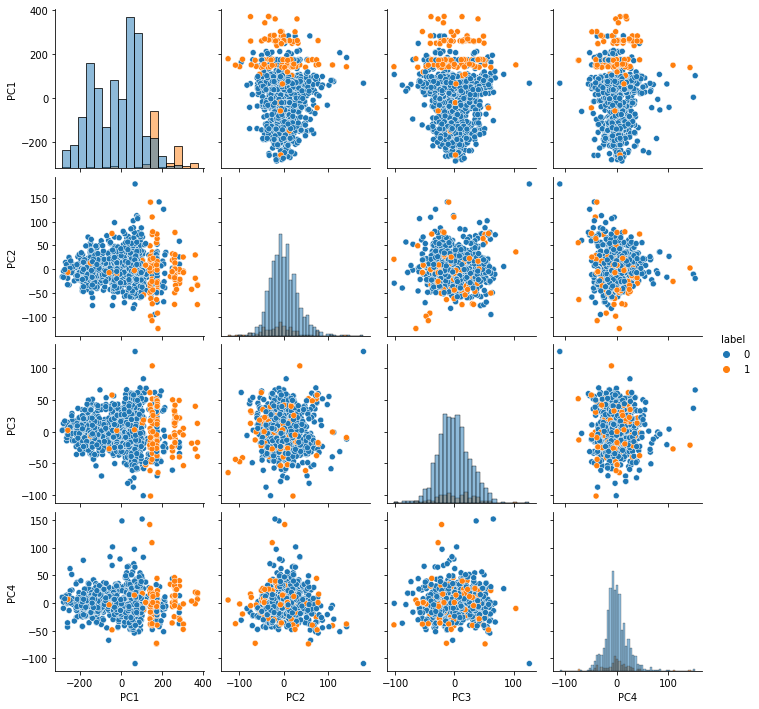

In [ ]:
#converting pca array to dataframe
pca_df = pd.DataFrame(X_pca, columns = ['PC1','PC2', 'PC3', 'PC4' ])

# adding label to pca_df 
pca_df['label'] = y

sns.pairplot(pca_df, hue = 'label', diag_kind = 'hist')
plt.show

We will now use this pca and implement it into the logistic regression. 

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 8)

In [ ]:
model = LogisticRegression() 
model.fit(X_train_pca, y_train)
model.score( X_test_pca, y_test ) ## Accuracy score of the Logistic Regression

0.9150943396226415

We have a near identical percentage of the model. 

As we can see, given this model, we can predict with 91.5% accurracy a difference between Legendary pokemon and non-legendary. I am suprised on how high that number is. One thing I would like to know is which variables were taken out of. But we cannot see which variables that were taken out due to the variables being projected into a new set of axes in order to get the most variation of the data. This means each variable is now a new linear combination of the original variables. 

Given what we have learned from the Correlation Heatmap plot, we know that Total-Attack (0.74), and Total-Sp. Atk (0.73) have the high correlation amongst each other. This means two possibilities, possibility one: It will be easier to create different clusters from one another (for all pokemon), or it will be the complete opposite. Before we initiate cluster analyisis, we must first pre-process the data in order for it to get as much information as we can. 

## Descision Tree/Random Forest  Diagram


In [ ]:
X = poke[stats_list] ## I do not want to re-write the stats in a list
X1 = poke[['HP', 'Attack','Defense','Sp. Atk', 'Sp. Def']] 
  ## Total does not contribute a lot in the accuracy compared to other regressions 
        ## Without Total, it will decrease from 93.86% to 91.51%

y1 = poke['Legendary'] 
y2 = poke['Ultra Beast'] # I am curious if this will have a high accuracy given how the low sample size, 
                         # and very little unique stat combination

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 8)

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(X_test)

accuracy_clf = accuracy_score(y_test, y_pred)

print('Accuracy from Decision Tree for Legendary Indicator:', accuracy_clf)

Accuracy from Decision Tree for Legendary Indicator: 0.8915094339622641


###Testing accuracy from Ultra Beast

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y2, test_size = 0.2, random_state = 8)

In [ ]:
y_pred = clf.predict(X_test)

accuracy_clf = accuracy_score(y_test, y_pred)

print('Accuracy from Decision Tree for Ultra Beast Indicator:', accuracy_clf)

Accuracy from Decision Tree for Ultra Beast Indicator: 0.8584905660377359


Given the amount of sample size (n =11), I am impressed that it was able to get 86% accuracy from what it was given. We can try to make it up to 95% like the other legendary indicator. 

We can also see if the accuracy can be different give we decrease the sample size of the pokemon to just legendary pokemon. My idea of this is since we know that the distribution amongst legendary and non-legendary is vastly different, we can see if we can accurately predict Ultra Beast with just give legendary pokemon.  

In [ ]:
X = df_legend[stats_list] ## I do not want to re-write the stats in a list

y = df_legend['Ultra Beast'] # I am curious if this will have a high accuracy given how the low sample size, 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

In [ ]:
## Accuracy test for predicting ultra beast vs legendary pokemon 
y_pred = clf.predict(X_test)

accuracy_clf = accuracy_score(y_test, y_pred)

print('Accuracy from Decision Tree for Legendary Indicator:', accuracy_clf)

Accuracy from Decision Tree for Legendary Indicator: 0.9166666666666666


K-Fold Validation

We can now do a K-Fold Validation in order to see if the model can still predict a legendary type pokemon and which of them are ultra beast type pokemon. This is because it evaluates the dataset k equally sized folds and tests it out on the last remaining testing fold. We then try to average it out in order to get an accurate estimate of the model's performance. 

In [ ]:
## Find out which pokemon is a legendary pokemon
from sklearn.model_selection import cross_val_score
score = cross_val_score(clf, X, y1, cv = 10).mean() 
 
 
print('Mean Accuracy Score:', score)

Mean Accuracy Score: 0.9385624438454627


In [ ]:
## Find out which pokemon we can see is a ultra beast
from sklearn.model_selection import cross_val_score
score = cross_val_score(clf, X, y2, cv = 10).mean() 
 

print('Mean Accuracy Score:', score)

Mean Accuracy Score: 0.9848337825696316


We have seen that the Mean Accuracy of the model for ultra beast is relatively high now. This is perhaps due to the numbers of ultra beast in the pokedex, and how similar they are stat-wise. There is no denying that it is easy to detect which pokemon is an ultra beast from legendary and non-legendary pokemon. 

The one thing that does suprise me however is how the legendary pokemon indicator has decreased. This maybe because of how many cross validations it needed to do, and how many times it needed to predict which are legendary and which are not inside of the folds. 

Plotting Decision Tree

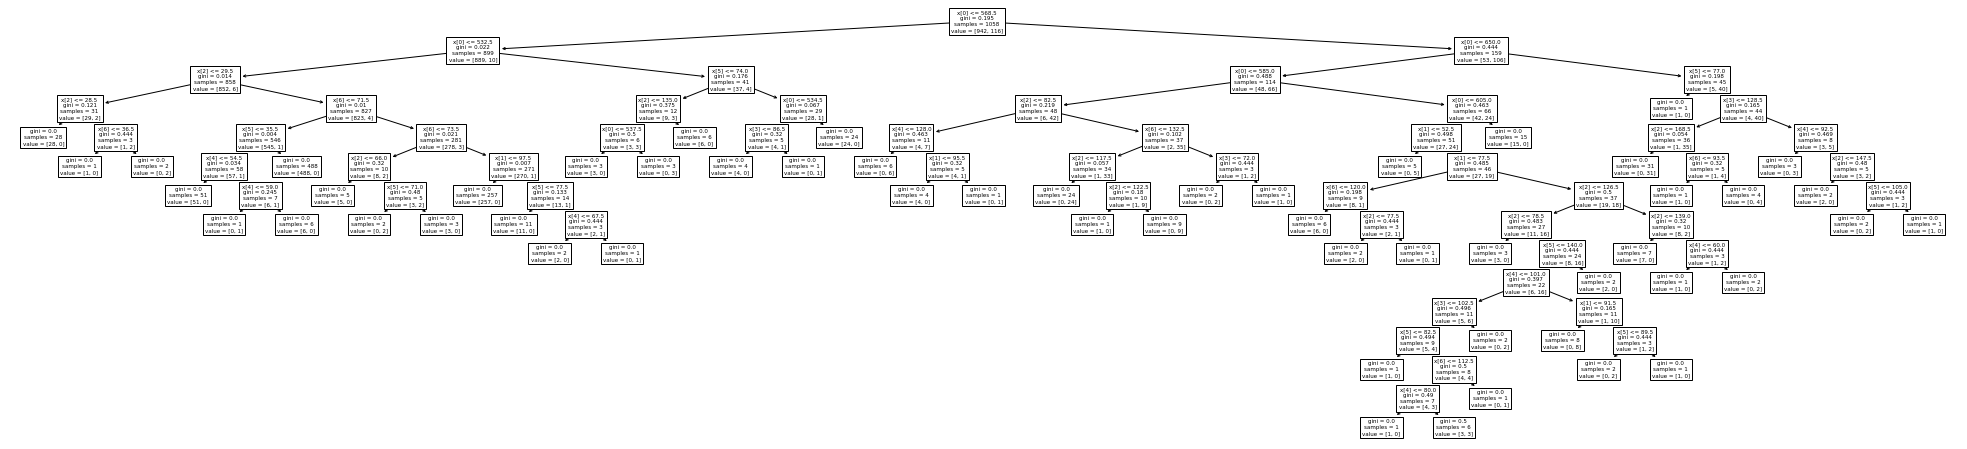

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X,y1)

fig, ax = plt.subplots(figsize= (35,8))
tree.plot_tree(clf, ax=ax)
plt.show()

This graph is enormous! I can see why it may be hard to read for this graph. Decision trees work like the following: It splits up data into subsets, then based on the input features, it will try to maximize the seperation between each classification until the data can be categorized into a certain place. 

Based on what I can see, there is not a lot of samples per box, meaning it is relatively easy for a value to fall into the earlier boxes if the stats are qualified. I think there is room for improvement, but I must read more about optimizing decision trees, as well as random forest. 

We can try to implement random forest with this in mind. Random forest is similar to decision trees, but it is built upon multiple decision trees, and is prioritized due to them reducing overfitting and increasing the overall accuracy of the data. 

### Random Forest for Legendary Pokemon 

In order to find out the best n_estimator, we must first have to use GrindSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import tree

rf_clf = RandomForestClassifier(n_estimators = 5, random_state = 8) ## n_estimator will create n amount of trees
                                                                     ## Here it will create 100

rf_clf = rf_clf.fit(X_train, y_train)

In [ ]:
y_pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest:", accuracy)

Accuracy of Random Forest: 0.9166666666666666


I have seen that it may not be possible to print out all Decision Trees of a random forest nicely since it is also of diagrams showing their parameters. I now know we can use export_text in order to show Random Forest one way and be able to interpret it better rather than expanding the Random Forest from the previous JPEG here in Google Colab

In [ ]:
## Printing Random Forest in here
from sklearn import tree
for i in range(len(rf_clf.estimators_)):
  print(tree.export_text(rf_clf.estimators_[i]))

|--- feature_0 <= 575.00
|   |--- feature_4 <= 91.00
|   |   |--- feature_5 <= 98.00
|   |   |   |--- feature_6 <= 74.00
|   |   |   |   |--- feature_4 <= 64.00
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_4 >  64.00
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- feature_6 >  74.00
|   |   |   |   |--- class: 0.0
|   |   |--- feature_5 >  98.00
|   |   |   |--- feature_5 <= 116.00
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_5 >  116.00
|   |   |   |   |--- class: 0.0
|   |--- feature_4 >  91.00
|   |   |--- class: 1.0
|--- feature_0 >  575.00
|   |--- class: 0.0

|--- feature_5 <= 43.50
|   |--- feature_4 <= 44.00
|   |   |--- class: 0.0
|   |--- feature_4 >  44.00
|   |   |--- class: 1.0
|--- feature_5 >  43.50
|   |--- feature_2 <= 64.00
|   |   |--- class: 1.0
|   |--- feature_2 >  64.00
|   |   |--- feature_4 <= 58.00
|   |   |   |--- feature_3 <= 205.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_3 >  205.50
|   |   |   |   |--- 

We can see this is how descision trees are created, and all of them equal a huge randomforest. I would've liked to create an output for a random forest, but in order to do so, one needs to print and paste all of them in the same notebook. 

Here we have features that the branches of the trees that can take at each node. There is an algorithm that chooses a feature and helps it provide the best split. Which is essentially a path a data point must go. In this case, the random forest deciding if the pokemon is an ultra beast or not.  

In [ ]:
# Before going in further, we need to see the feature importance
  # A feature importance allows us to see how importance a variable is 
      ## This allows the tree to split nodes based on how impure or how muchc information gains from the regression model
          ## This also will help us use less variables/features 
importance = rf_clf.feature_importances_
columns = X_train.columns

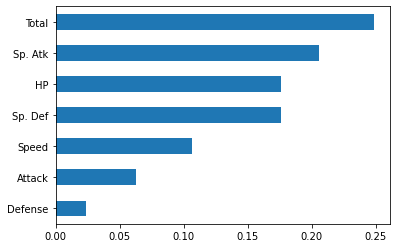

In [ ]:
rfc_coff = pd.Series(importance, columns)
rfc_coff.sort_values().plot.barh();

In [ ]:
rfc_coff

NameError: ignored

This graph is relatively straight forwards as it allows us to see which variables from the model are imporatance for the model to predicct correctly. This can also be implemented in other regressions in order to see which variables can be taken out in order to produce a better and less convoluted regression. In this case, it maybe wise to take out defense since it does seem that it does not contribute a lot for the RandomForest. 

In [ ]:
# Getting precision, recall, and f1score
from sklearn.metrics import classification_report
from sklearn import tree

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        22
         1.0       0.00      0.00      0.00         2

    accuracy                           0.92        24
   macro avg       0.46      0.50      0.48        24
weighted avg       0.84      0.92      0.88        24



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In this classification report we can see that the model performs greatly with the given dataset. Precision is defiend as the ration of all true positives to the sum of true positive and false positives of the model. This means a high precision score creates a low amount of false positive predictions. Recall is how the model can evaluate which values are truly true positives. This is calculated by (True Positive)/(True Postive + False Negative). While f1-score is a weighted average amongsts both. This is calculated by 2*(Precision*Recall)/(Precision+Recall).

# KNN Cluster Analysis

Scaling the data 

In [ ]:
scaler = MinMaxScaler() ## Translates each variable into the given range by the help of standard deviation and (max - min) + min
  ## We also do this in order to perserve the data's distribution

## Creating new columns with the scaled data in mind
columns_to_scale = stats_list

scaled_values = scaler.fit_transform(poke[stats_list])

scaled_df = pd.DataFrame(scaled_values, columns = [f"{col}_scaled" for col in columns_to_scale]) # Creating new columns with stats_scaled (ex. Total_scaled... )

merged_df = pd.concat([poke, scaled_df], axis = 1)


In [ ]:
merged_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Mythical,Ultra Beast,Type,Total_scaled,HP_scaled,Attack_scaled,Defense_scaled,Sp. Atk_scaled,Sp. Def_scaled,Speed_scaled
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,0.0,0.0,Grass/Poison,0.236364,0.173228,0.237838,0.195556,0.298913,0.214286,0.205128
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,0.0,0.0,Grass/Poison,0.380165,0.232283,0.308108,0.257778,0.380435,0.285714,0.282051
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,0.0,0.0,Grass/Poison,0.578512,0.311024,0.416216,0.346667,0.489130,0.380952,0.384615
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,0.0,0.0,Grass/Poison,0.743802,0.311024,0.513514,0.524444,0.608696,0.476190,0.384615
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,...,0.0,0.0,Fire/Fire,0.221488,0.149606,0.254054,0.168889,0.271739,0.142857,0.307692


Before we set up the KMeans values and clusters, we must find the numbers of clusters (or n_clusters) that we can use for this situation. We can definitely do n = 100, but that would cause overfitting of the data, and we would like to have the lowest n values we can in order to make the unsupervised learning easier to implement for future runs. 

Creating Elbow Method to minimize the amount of clusters created. 

In [ ]:
scaled_stats = scaler.fit_transform(poke[['Total', 'HP' ,'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]) ## Scaler = minmaxscaler, also need to do just these values

score = []
for cluster in range(1, 20):
  kmeans_f = KMeans(n_clusters = cluster, init = 'k-means++', random_state = 42) ## random state in order to replicate the same process
  kmeans_f.fit(scaled_stats)
  score.append(kmeans_f.inertia_) ## inertia is how well a dataset was clustered by K-Means

Graphing elbow method

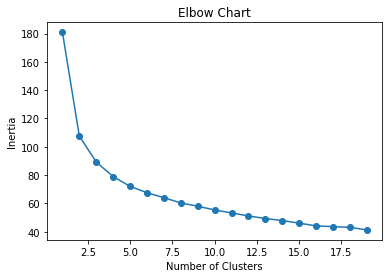

In [ ]:
plt.plot(range(1,20), score)
plt.scatter(range(1,20), score)

plt.title('Elbow Chart')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.show()

We can see that n = 5 would be the most optimal cluster avaiable for all pokemon.

Now we can put it back into the dataframe in order to see which pokemon is considered in which cluster

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans.fit(scaled_stats)

merged_df['Cluster'] = kmeans.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
merged_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Attack_scaled,Pokemon_#,Total_scaled,HP_scaled,Attack_scaled,Defense_scaled,Sp. Atk_scaled,Sp. Def_scaled,Speed_scaled,Cluster
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,0.237838,1,0.236364,0.173228,0.237838,0.195556,0.298913,0.214286,0.205128,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,0.308108,2,0.380165,0.232283,0.308108,0.257778,0.380435,0.285714,0.282051,3
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,0.416216,3,0.578512,0.311024,0.416216,0.346667,0.489130,0.380952,0.384615,1
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,0.513514,4,0.743802,0.311024,0.513514,0.524444,0.608696,0.476190,0.384615,4
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,...,0.254054,5,0.221488,0.149606,0.254054,0.168889,0.271739,0.142857,0.307692,0


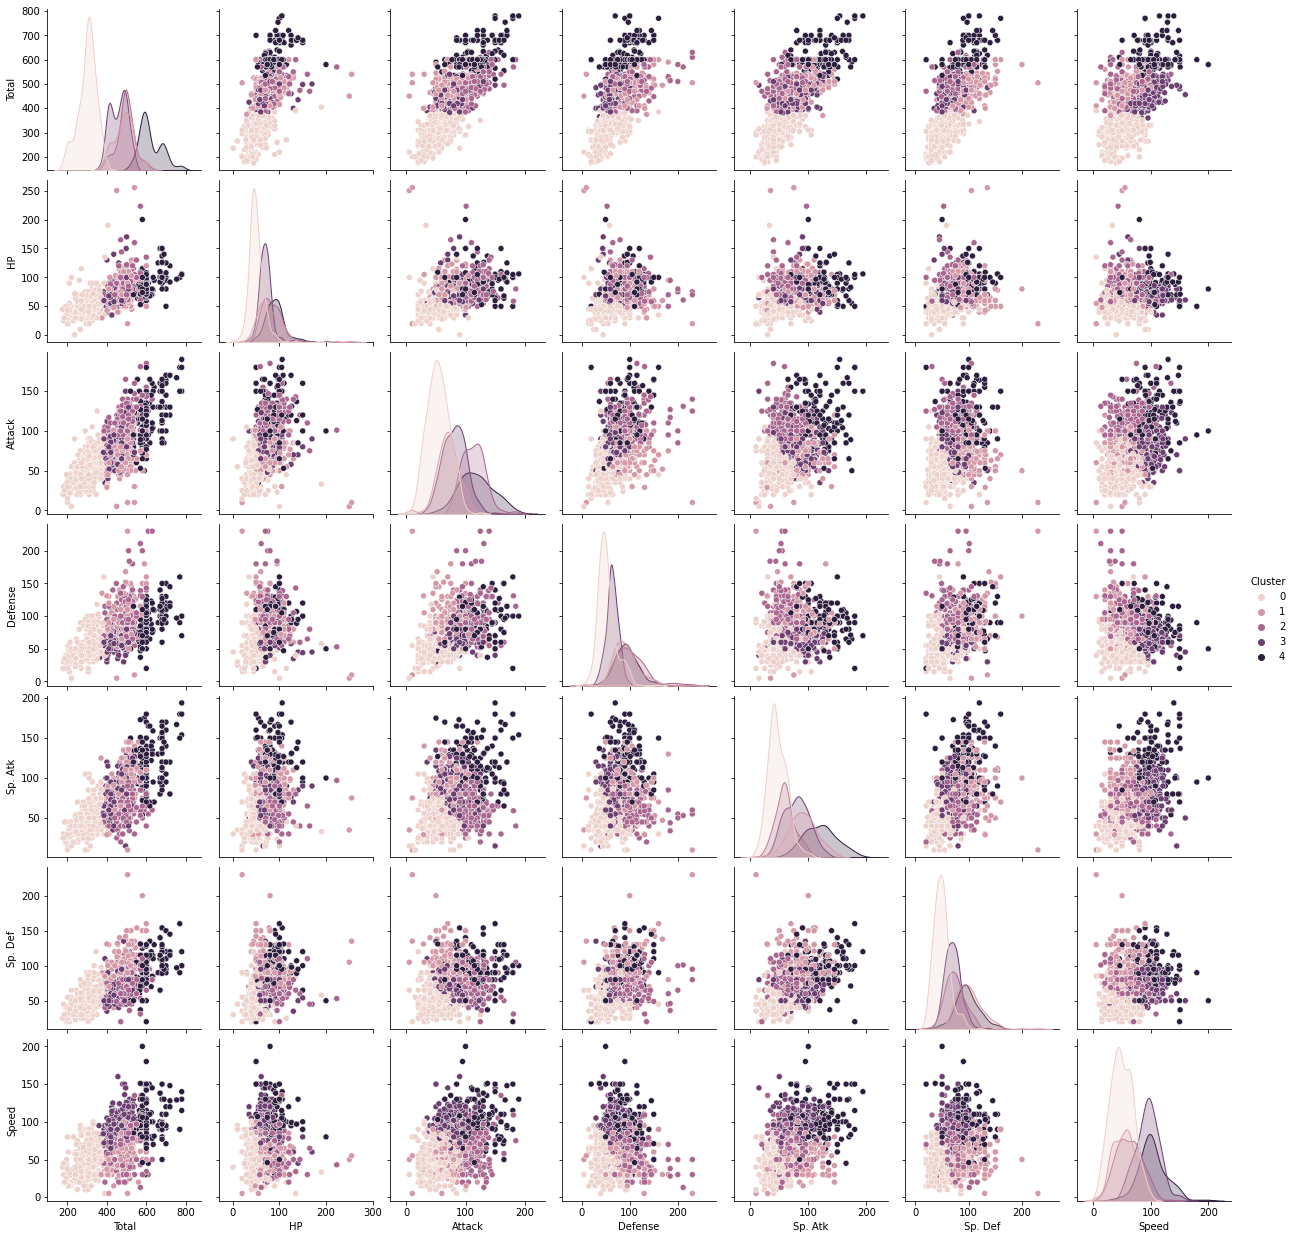

In [ ]:
## Creating graphs based upon the new clusters
## color_map = {"0": "Red", "1": "Blue", "2": "Yellow", "3": "Green", "4": "Purple"}
sns.pairplot(merged_df[['Total', 'HP' ,'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Cluster']], hue = 'Cluster')

We can get more information about the Clusters if we do a Boxplot before coming up to a conclusion. As well as creating some correlation heatmaps 

In [ ]:
merged_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Ultra Beast,Type,Total_scaled,HP_scaled,Attack_scaled,Defense_scaled,Sp. Atk_scaled,Sp. Def_scaled,Speed_scaled,Cluster
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,0.0,Grass/Poison,0.236364,0.173228,0.237838,0.195556,0.298913,0.214286,0.205128,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,0.0,Grass/Poison,0.380165,0.232283,0.308108,0.257778,0.380435,0.285714,0.282051,3
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,0.0,Grass/Poison,0.578512,0.311024,0.416216,0.346667,0.489130,0.380952,0.384615,1
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,0.0,Grass/Poison,0.743802,0.311024,0.513514,0.524444,0.608696,0.476190,0.384615,4
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,...,0.0,Fire/Fire,0.221488,0.149606,0.254054,0.168889,0.271739,0.142857,0.307692,0


Text(0, 0.5, 'Value')

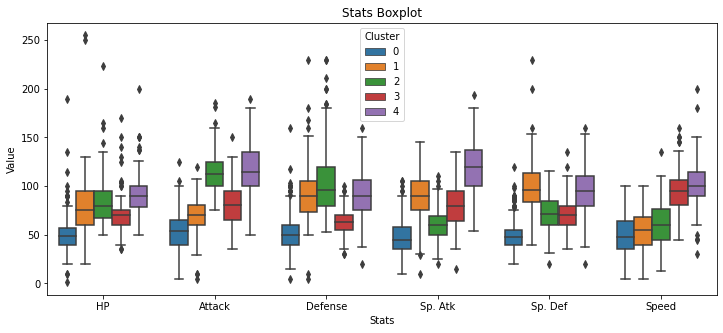

In [ ]:
Boxplot_cluster = pd.melt(merged_df, id_vars = [
    "#", 
    "Name", 
    "Type 1", 
    "Type 2", 
    "Generation",
    "Cluster" # Creating these into rows
    ], value_vars = [
    "HP", 
    "Attack", 
    "Defense", 
    "Sp. Atk",
    "Sp. Def", 
    "Speed"  # Keeping these into columns 
])
plt.figure(figsize=(12,5))
fig = sns.boxplot(x="variable", y="value", hue = "Cluster", data=Boxplot_cluster)
plt.title("Stats Boxplot")
plt.xlabel("Stats")
plt.ylabel("Value")

We can see that in Cluster 4 it contains the most amount of stats compared to the others, but it also the widest standard deviation compared to others due to its big size. Another thing to note is Cluster 0 appears to be the smallest boxplot in all categories. But there are some huge outliers coming from Cluster 0 that can be seen. It is not to the point where we must see which pokemon are the outliers since all clusters contain outliers as well. 

## Radar Diagram for Pokemon 

A radar map is a plot that allow us to see the distribution of each stat based on the output in a better manner than a boxplot and plot chart can. Radar maps are often used in various other animes such as the Persona, Jojo's Bizzare Adventure, and Naruto.

I tried to find some resources to do the radar map and many seem rigorous. I have found called Flourish that will help me create better visuals without writing a lot of code. 

Adding cluster_x to dataframe in order to use it for flourish.

In [ ]:
def get_cluster_name(cluster_num):
  return f"Cluster {cluster_num}"

merged_df['Cluster_x'] = merged_df['Cluster'].apply(get_cluster_name) 

In [ ]:
merged_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Type,Total_scaled,HP_scaled,Attack_scaled,Defense_scaled,Sp. Atk_scaled,Sp. Def_scaled,Speed_scaled,Cluster,Cluster_x
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Grass/Poison,0.236364,0.173228,0.237838,0.195556,0.298913,0.214286,0.205128,0,Cluster 0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Grass/Poison,0.380165,0.232283,0.308108,0.257778,0.380435,0.285714,0.282051,3,Cluster 3
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Grass/Poison,0.578512,0.311024,0.416216,0.346667,0.489130,0.380952,0.384615,1,Cluster 1
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,Grass/Poison,0.743802,0.311024,0.513514,0.524444,0.608696,0.476190,0.384615,4,Cluster 4
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,...,Fire/Fire,0.221488,0.149606,0.254054,0.168889,0.271739,0.142857,0.307692,0,Cluster 0


In [ ]:
## Converting merged data into csv file for Flourish Visualization
merged_df.to_csv('Kmeans_pokemon.csv', index = False)

In [ ]:
## Embeding (Overall*) Radar Diagram on Colab
  ## * I am going to plot the overall mean for each cluster since I want a better picture of each cluster's stats (on average of course)
    ## Link: https://public.flourish.studio/visualisation/13081980/

HTML('<iframe src="https://public.flourish.studio/visualisation/13081980/" width="700" height="570"></iframe>')

We can see that there is not a clear message from all of this cluster. But we can say that cluster 4 is the one that has the most values stats wise, and we can also see that Cluster 0 is the cluster that contains the least values stats wise as well. What we can do now is to get the mean of all clusters and put them in the same radar graph to see which cluster is best and worst. 

In [ ]:
## Radar Plot for Mean Pokemon Clusters 
scaled_stats = ['Total_scaled', 'HP_scaled', 'Attack_scaled', 'Defense_scaled', 'Sp. Atk_scaled', 'Sp. Def_scaled', 'Speed_scaled']
cluster_means = merged_df.groupby('Cluster').mean()[scaled_stats]

cluster_means['Cluster'] = range(0,5)

cluster_means['Cluster_x'] = cluster_means['Cluster'].apply(get_cluster_name)

cluster_means.head()

,Total_scaled,HP_scaled,Attack_scaled,Defense_scaled,Sp. Atk_scaled,Sp. Def_scaled,Speed_scaled,Cluster,Cluster_x
Cluster,,,,,,,,,
0,0.207062,0.193305,0.264435,0.207841,0.200238,0.136323,0.225728,0,Cluster 0
1,0.515409,0.304757,0.352375,0.389744,0.436423,0.385855,0.252587,1,Cluster 1
2,0.528570,0.325742,0.584852,0.431886,0.272561,0.254236,0.292993,2,Cluster 2
3,0.469467,0.272815,0.412256,0.259724,0.378807,0.237876,0.458561,3,Cluster 3
4,0.737235,0.353346,0.611176,0.387027,0.601682,0.364575,0.501836,4,Cluster 4


In [ ]:
# Saving cluster to csv for analysis
cluster_means.to_csv('Radar_means.csv', index = False)

In [ ]:
## Embeding (Mean) Radar Diagram on Colab
## Link: https://public.flourish.studio/visualisation/13094157/

HTML('<iframe src="https://public.flourish.studio/visualisation/13094157/" width="700" height="720"></iframe>')

We can see that cluster 4 has the "strongest" from all clusters. We can also see that cluster 0 is the one that has the "weakest" pokemon. From all clusters, we can see cluster 2 has the most attack stat on average when it comes to cluster 1-3. Cluster 1 does contain the most balanced distribution of stats compared to the other 2. Cluster 3 is a real glass canon since it contains noticable higher stats in attack and special attack, as well as having high speed, but it is nothing too special. Cluster 3 may in fact be considered as the glass canon cluster of pokemon. Cluster 0 can be the weakest pokemon. Cluster 1 can be the balanced pokemon. Cluster 2 can be high attack pokemon. While Cluster 4 can be the best/strongest pokemon in the game. 

## Cluster Visual with Cluster Names

We can also plot the cluster thanks to flourish since it has better visualization compared to matplotlib. 

In [ ]:
## Changing Cluster 0-4 into Cluster names from previous text via dictionaries
cluster_names = {"Cluster 0": "Weakest", 
                 "Cluster 1": "Balanced", 
                 "Cluster 2": "High Attack", 
                 "Cluster 3": "Glass Cannon", 
                 "Cluster 4": "Overpowered"}
merged_df['Cluster_x'] = merged_df['Cluster_x'].replace(cluster_names)
## merged_df.head()

In [ ]:
merged_df.to_csv('Knn_values.csv', index = False)

In [ ]:
## Embeding (Mean) Kmeans Diagram on Colab
## Link: https://public.flourish.studio/visualisation/13095503/

HTML('<iframe src="https://public.flourish.studio/visualisation/13095503/" width="700" height="720"></iframe>')

## I want to remove the "Type 1/Type 1" so bad. I will see if I can remove it based on if conditions. 

/usr/local/lib/python3.9/dist-packages/IPython/core/display.py:701: UserWarning:

Consider using IPython.display.IFrame instead



# Conclusion

There is a lot to unwrapped from this Data Exploration Project. This maybe a long text, but I will try my best to bullet point most of what I've found interesting. 

*   Pokemon with one-type from generation 5-7 has experienced a big nose dive in representation. We can also see Pokemon with two-types did also suffer from not having alot of representation as well. 
*   Overall, the population between one-type and two-type Pokemon does seem similar until the mentioned nose dive from generation 5-6, where two-type pokemon have more representation in Pokemon games

* When conducting a T-test, I have found that Pokemon with two-type and one-type are statistically significant from one another. This means that Pokemon with two-types, on average, had usually higher stats than pokemon with one-type. 

*  Water-types have a big representation at a whopping 10.63%, following by Normal-types 9.40%. But when it comes to legendary pokemon, Psychic and Dragon-types become most potent (16.84% and 11.05% respectively). 
*  Shockingly Fire-types are not even top 5 most frequent types dispite being the main 3 types to be selected at the beginning of the game as a starter pokemon. As well as not being a potent type when it comes to legendary Pokemon. 


*   Every 'Total' stat, on average (per generation/region), for non-legendary-pokemon has been very consistent. 
*   Same goes for legendary but generation 7th (Alola) has experienced an average total stat of 561 (a huge 10% decrease of the total average of all legendaries) 


*   Thanks to ANOVA, we now know that a lot of types do contain stats that are statistically significant from one another. 

*  The Attack stat/attribute for all pokemon was statistically significant, based on regions/generations. (I assume it is because of the outliers of the different regions/generations)

*   We can also see that HP and Defense were the ones that were most stastitcally significant across different regions(based individually per type).

*   Ghost-types have a random distribution of stats than other typings. This is means that there may be no way of predicting where what stat/attribute will be more prominent in the next set of generations. 




*   When it comes to linear regression, We cannot predict HP nor Speed, based upon a pokemon's other stats (since R^2 will normally be 0.31 without the 'Total' stat).
*   Ridge regression proved to be a better regression than LASSO for this case. Due to having lower AIC/BIC, and not significantly decreasing R^2



*   A logistic regression of determining a legendary pokemon vs a non-legendary pokemon was really high. The accuracy score, on average, was around the range of 90-97% accuracy
*   Predicting an Ultra Beast from the legendary dataframe was relatively easy for the model. It was was easier if it had more datapoints if we let it play with the Poke (main) dataframe. 

*   Dispite being statistically signifiant when it comes to ANOVA, Defense is not a great variable to predict a pokemon's status of being an Ultra Beast, nor a legendary pokemon. We can see this being true because of the model's feature importance of a RandomForestClassifier (the feature importance is less than 0.05 for Defense).  

*   When it comes to cluster analysis. We have found, via the elbow method, that 5 clusters will be suffice. Based on the Radar graphs, we can see that each cluster does contain a different distribution of stats. An example of this can be how Cluster 3 is a real glass canon cluster (high (special) attack, but low defense), Cluster 1 does contain the most balanced distribution of stats. 

* We can then create a visual to showcase the cluster analysis thanks to Flourish and be able to see which pokemon belong inside of the clusters. 





















# Plans for the Future

As previously stated, I hope to make this a long term project since I grew up with Pokemon at the age of 6. I always wanted to do something with math and try to implement mathematics with the hobbies I love. I would say that Statistics really helped me out fulfill a lot of the questions I have about the game/anime, but it does not fully satisfy my hunger of pokemon knowledge. What I would like to is to be able to do the following:

* Be able to create better visuals than the ones here in Python
* See if I can include Pokemon weaknesses and strengths, and visualize them.
* Be able to get the move pool for all pokemon and create a useful User Interface that allows
* Find out more machine learning methods in order to implement them in other parts of the dataset. 
* Find out if there is a way to incorperate this statistical analysis along with the competitive state of Pokemon. 

There are the few plans I currently have. I am hoping that I will make all them into a reality!